In [100]:
pip install datasets


In [101]:
pip install python-chess

In [102]:
from google.colab import files
uploaded = files.upload()


Saving games.csv to games (1).csv


In [103]:
import pandas as pd

df = pd.read_csv('games.csv')
df.head()


id  rated    created_at  last_move_at  turns victory_status winner  \
0  TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime  white   
1  l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign  black   
2  mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate  white   
3  kWKvrqYL   True  1.504110e+12  1.504110e+12     61           mate  white   
4  9tXo1AUZ   True  1.504030e+12  1.504030e+12     95           mate  white   

  increment_code       white_id  white_rating      black_id  black_rating  \
0           15+2       bourgris          1500          a-00          1191   
1           5+10           a-00          1322     skinnerua          1261   
2           5+10         ischia          1496          a-00          1500   
3           20+0  daniamurashov          1439  adivanov2009          1454   
4           30+3      nik221107          1523  adivanov2009          1469   

                                               moves opening_eco  \
0  d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...         D10   
1  d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...         B00   
2  e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...         C20   
3  d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...         D02   
4  e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...         C41   

                             opening_name  opening_ply  
0        Slav Defense: Exchange Variation            5  
1  Nimzowitsch Defense: Kennedy Variation            4  
2   King's Pawn Game: Leonardis Variation            3  
3  Queen's Pawn Game: Zukertort Variation            3  
4                        Philidor Defense            5

In [104]:
print(df.columns)



Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')


In [105]:
print(df.describe())


         created_at  last_move_at         turns  white_rating  black_rating  \
count  2.005800e+04  2.005800e+04  20058.000000  20058.000000  20058.000000   
mean   1.483617e+12  1.483618e+12     60.465999   1596.631868   1588.831987   
std    2.850151e+10  2.850140e+10     33.570585    291.253376    291.036126   
min    1.376772e+12  1.376772e+12      1.000000    784.000000    789.000000   
25%    1.477548e+12  1.477548e+12     37.000000   1398.000000   1391.000000   
50%    1.496010e+12  1.496010e+12     55.000000   1567.000000   1562.000000   
75%    1.503170e+12  1.503170e+12     79.000000   1793.000000   1784.000000   
max    1.504493e+12  1.504494e+12    349.000000   2700.000000   2723.000000   

        opening_ply  
count  20058.000000  
mean       4.816981  
std        2.797152  
min        1.000000  
25%        3.000000  
50%        4.000000  
75%        6.000000  
max       28.000000  


In [106]:
print(df['white_id'].unique()[:10])
print(df['black_id'].unique()[:10])


['bourgris' 'a-00' 'ischia' 'daniamurashov' 'nik221107' 'trelynn17'
 'capa_jr' 'daniel_likes_chess' 'ehabfanri' 'shivangithegenius']
['a-00' 'skinnerua' 'adivanov2009' 'franklin14532' 'daniel_likes_chess'
 'soultego' 'mirco25' 'anaissac' 'subham777' 'roman12342005']


In [107]:
df_ai_white = df[df['white_id'] == 'AI']
df_ai_black = df[df['black_id'] == 'AI']

print("Partidas donde la IA juega con blancas:")
print(df_ai_white.head())

print("Partidas donde la IA juega con negras:")
print(df_ai_black.head())


Partidas donde la IA juega con blancas:
Empty DataFrame
Columns: [id, rated, created_at, last_move_at, turns, victory_status, winner, increment_code, white_id, white_rating, black_id, black_rating, moves, opening_eco, opening_name, opening_ply]
Index: []
Partidas donde la IA juega con negras:
Empty DataFrame
Columns: [id, rated, created_at, last_move_at, turns, victory_status, winner, increment_code, white_id, white_rating, black_id, black_rating, moves, opening_eco, opening_name, opening_ply]
Index: []


In [108]:
df_ai = df[(df['white_id'] == 'AI') | (df['black_id'] == 'AI')]

# Comparo primero el rating
print("Media de rating de la IA como blancas:", df_ai['white_rating'].mean())
print("Media de rating de la IA como negras:", df_ai['black_rating'].mean())

# Ahora contra jugadores humanos
df_human = df[(df['white_id'] != 'AI') & (df['black_id'] != 'AI')]
print("Media de rating de jugadores humanos:", df_human[['white_rating', 'black_rating']].mean())


Media de rating de la IA como blancas: nan
Media de rating de la IA como negras: nan
Media de rating de jugadores humanos: white_rating    1596.631868
black_rating    1588.831987
dtype: float64


In [109]:
# Valores nulos
missing_values = df.isnull().sum()

# Nulos por columna
print("Valores nulos por columna:")
print(missing_values[missing_values > 0])

# Porcentaje de nulos por columna
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPorcentaje de valores nulos por columna:")
print(missing_percentage[missing_percentage > 0])

Valores nulos por columna:
Series([], dtype: int64)

Porcentaje de valores nulos por columna:
Series([], dtype: float64)


In [110]:
# Estadísticas detalladas
print("\n🔹 Descripción completa de los datos:")
print(df.describe(include="all"))

# Información general
print("\n🔹 Información general del dataset:")
print(df.info())

# Valores únicos por columna
print("\n🔹 Número de valores únicos por columna:")
print(df.nunique())

# Valores nulos
print("\n🔹 Valores nulos en el dataset:")
print(df.isnull().sum())

# Distribución de valores en las columnas categóricas
print("\n🔹 Distribución de valores en columnas categóricas:")
for col in df.select_dtypes(include=["object"]):
    print(f"\nDistribución de {col}:")
    print(df[col].value_counts())

# Correlación variables
print("\n🔹 Matriz de correlación:")
print(df.corr(numeric_only=True))


🔹 Descripción completa de los datos:
              id  rated    created_at  last_move_at         turns  \
count      20058  20058  2.005800e+04  2.005800e+04  20058.000000   
unique     19113      2           NaN           NaN           NaN   
top     XRuQPSzH   True           NaN           NaN           NaN   
freq           5  16155           NaN           NaN           NaN   
mean         NaN    NaN  1.483617e+12  1.483618e+12     60.465999   
std          NaN    NaN  2.850151e+10  2.850140e+10     33.570585   
min          NaN    NaN  1.376772e+12  1.376772e+12      1.000000   
25%          NaN    NaN  1.477548e+12  1.477548e+12     37.000000   
50%          NaN    NaN  1.496010e+12  1.496010e+12     55.000000   
75%          NaN    NaN  1.503170e+12  1.503170e+12     79.000000   
max          NaN    NaN  1.504493e+12  1.504494e+12    349.000000   

       victory_status winner increment_code white_id  white_rating black_id  \
count           20058  20058          20058    20058  

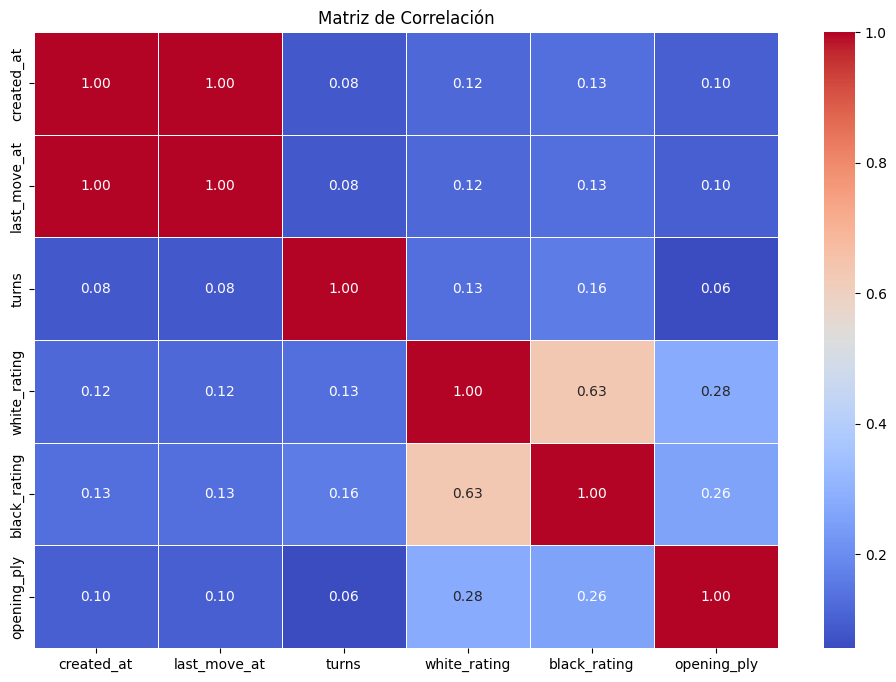

In [111]:
# Selecciono solo las numéricas
df_numeric = df.select_dtypes(include=['number'])

# Calculo la matriz de correlación
corr_matrix = df_numeric.corr()

# Dibujo el heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()


<ipython-input-112-214957d63e4d>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_openings = df.groupby(['rating_group', 'opening_name']).size().reset_index(name='count')
<ipython-input-112-214957d63e4d>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_10_per_level = top_openings.groupby('rating_group').head(10)


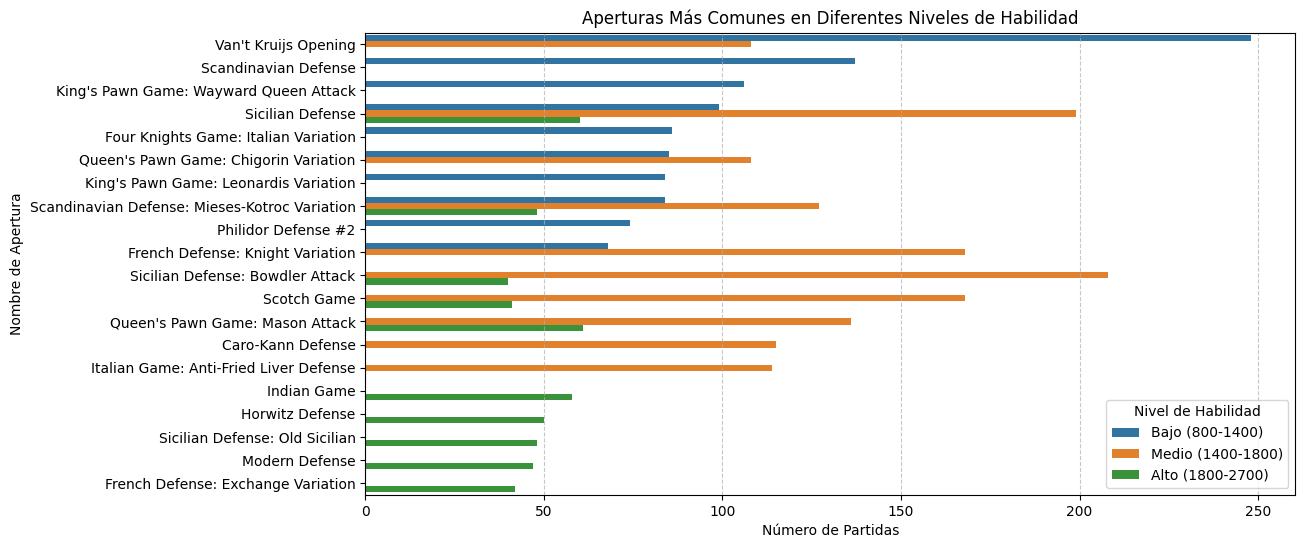

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Defino niveles de habilidad basados en el rating
bins = [800, 1400, 1800, 2700]
labels = ['Bajo (800-1400)', 'Medio (1400-1800)', 'Alto (1800-2700)']

df['rating_group'] = pd.cut(df['white_rating'], bins=bins, labels=labels)

# 10 aperturas más comunes en cada nivel
top_openings = df.groupby(['rating_group', 'opening_name']).size().reset_index(name='count')
top_openings = top_openings.sort_values(['rating_group', 'count'], ascending=[True, False])

# Filtro las 10 aperturas más comunes por nivel
top_10_per_level = top_openings.groupby('rating_group').head(10)

# Hago el gráfico de barras de aperturas más usadas en cada nivel de habilidad
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_per_level, x='count', y='opening_name', hue='rating_group', dodge=True)
plt.xlabel("Número de Partidas")
plt.ylabel("Nombre de Apertura")
plt.title("Aperturas Más Comunes en Diferentes Niveles de Habilidad")
plt.legend(title="Nivel de Habilidad")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


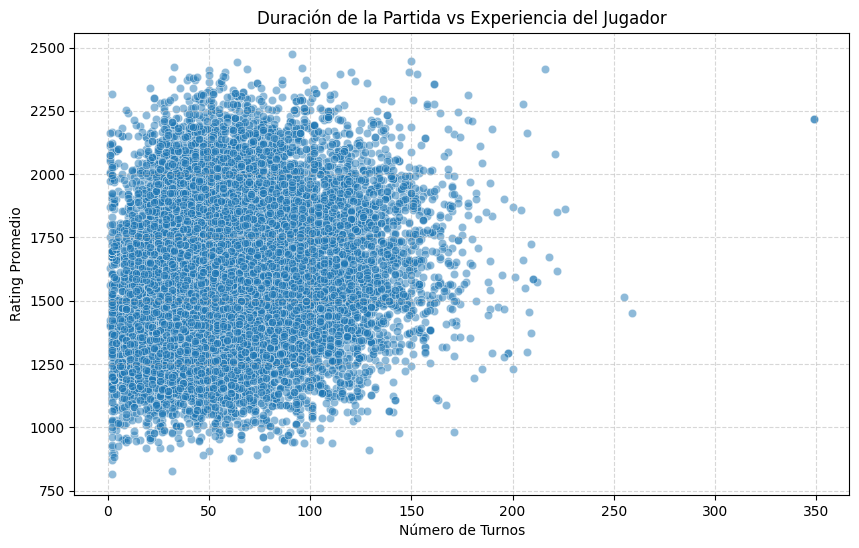

In [113]:
# Nueva columna con el rating promedio de ambos jugadores
df['avg_rating'] = (df['white_rating'] + df['black_rating']) / 2

# Gráfico de dispersión para ver la relación entre turnos y rating promedio
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='turns', y='avg_rating', alpha=0.5)
plt.xlabel("Número de Turnos")
plt.ylabel("Rating Promedio")
plt.title("Duración de la Partida vs Experiencia del Jugador")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [114]:
# Número total de victorias para cada apertura
win_counts = df.groupby("opening_name")["winner"].value_counts().unstack().fillna(0)

# Total de partidas jugadas por cada apertura
win_counts["total"] = win_counts.sum(axis=1)

# Porcentaje de victorias para blancas y negras
win_counts["white_pct"] = (win_counts["white"] / win_counts["total"]) * 100
win_counts["black_pct"] = (win_counts["black"] / win_counts["total"]) * 100

# 10 aperturas con más victorias para blancas
top_white_wins = win_counts.sort_values(by="white", ascending=False).head(10)
top_black_wins = win_counts.sort_values(by="black", ascending=False).head(10)

# Imprimo los resultados
print("🔹 Aperturas con más victorias para blancas (conteo absoluto y porcentaje):")
print(top_white_wins[["white", "white_pct"]])

print("\n🔹 Aperturas con más victorias para negras (conteo absoluto y porcentaje):")
print(top_black_wins[["black", "black_pct"]])


🔹 Aperturas con más victorias para blancas (conteo absoluto y porcentaje):
winner                                         white  white_pct
opening_name                                                   
Scandinavian Defense: Mieses-Kotroc Variation  164.0  63.320463
Sicilian Defense                               149.0  41.620112
Scotch Game                                    145.0  53.505535
French Defense: Knight Variation               135.0  49.815498
Philidor Defense #3                            127.0  64.141414
Van't Kruijs Opening                           126.0  34.239130
Sicilian Defense: Bowdler Attack               119.0  40.202703
Queen's Pawn Game: Mason Attack                116.0  50.000000
Queen's Pawn Game: Chigorin Variation          112.0  48.908297
Horwitz Defense                                110.0  52.631579

🔹 Aperturas con más victorias para negras (conteo absoluto y porcentaje):
winner                                 black  black_pct
opening_name              

In [115]:
# Total de victorias para cada apertura
win_counts = df.groupby("opening_name")["winner"].value_counts().unstack().fillna(0)

# Total de partidas jugadas por cada apertura
win_counts["total"] = win_counts.sum(axis=1)

# Aperturas con más de 100 partidas jugadas
win_counts = win_counts[win_counts["total"] > 100]

# Porcentaje de victorias para blancas y negras
win_counts["white_pct"] = (win_counts["white"] / win_counts["total"]) * 100
win_counts["black_pct"] = (win_counts["black"] / win_counts["total"]) * 100

# Ordeno por porcentaje de victorias
top_white_pct = win_counts.sort_values(by="white_pct", ascending=False).head(10)
top_black_pct = win_counts.sort_values(by="black_pct", ascending=False).head(10)

# Resultados
print("🔹 Aperturas con mayor porcentaje de victorias para blancas (≥100 partidas jugadas):")
print(top_white_pct[["white", "total", "white_pct"]])

print("\n🔹 Aperturas con mayor porcentaje de victorias para negras (≥100 partidas jugadas):")
print(top_black_pct[["black", "total", "black_pct"]])


🔹 Aperturas con mayor porcentaje de victorias para blancas (≥100 partidas jugadas):
winner                                         white  total  white_pct
opening_name                                                          
Queen's Gambit Refused: Marshall Defense        84.0  127.0  66.141732
Queen's Pawn                                    85.0  129.0  65.891473
Philidor Defense #3                            127.0  198.0  64.141414
Scandinavian Defense: Mieses-Kotroc Variation  164.0  259.0  63.320463
Philidor Defense                                84.0  135.0  62.222222
Queen's Gambit Declined                         69.0  116.0  59.482759
French Defense: Normal Variation                76.0  129.0  58.914729
Pirc Defense #4                                 63.0  107.0  58.878505
Italian Game                                    62.0  109.0  56.880734
Queen's Gambit Accepted: Old Variation          62.0  111.0  55.855856

🔹 Aperturas con mayor porcentaje de victorias para negras (≥100

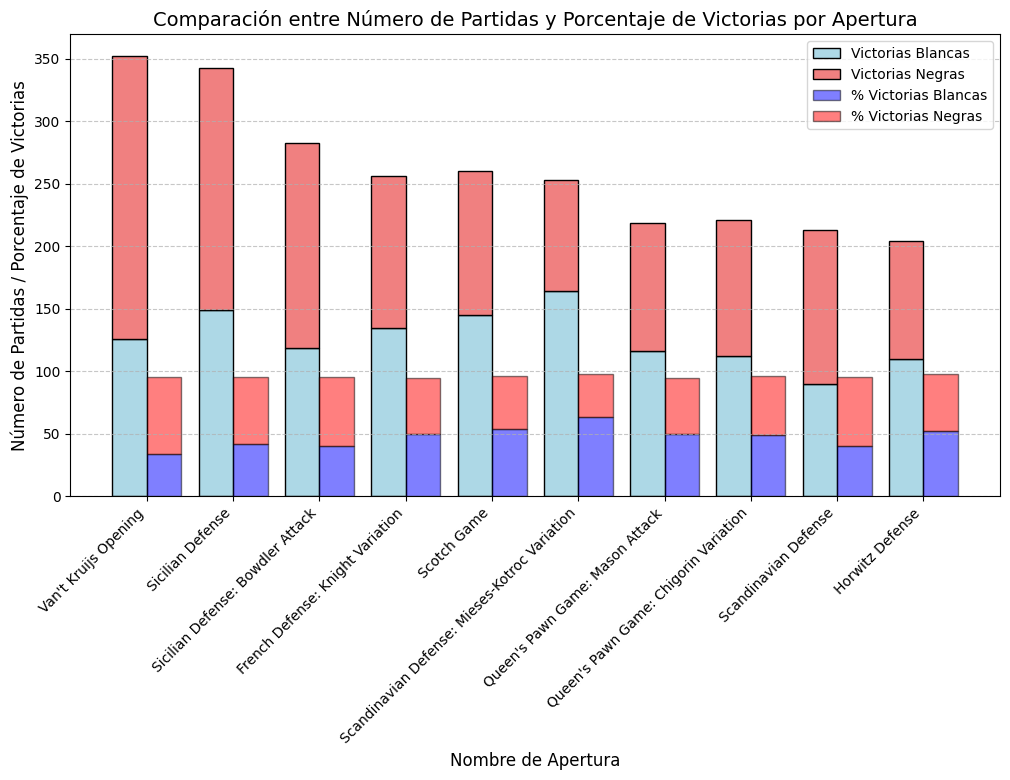

In [116]:
import matplotlib.pyplot as plt
import numpy as np

# Juegos por apertura
total_games = df["opening_name"].value_counts()

# Victorias por apertura
win_counts = df.groupby("opening_name")["winner"].value_counts().unstack().fillna(0)

# Aperturas jugadas más de 100 veces
popular_openings = total_games[total_games > 100].index
win_counts = win_counts.loc[popular_openings]

# Porcentaje de victorias por cada apertura
win_counts["total_games"] = win_counts.sum(axis=1)
win_counts["white_win_pct"] = (win_counts["white"] / win_counts["total_games"]) * 100
win_counts["black_win_pct"] = (win_counts["black"] / win_counts["total_games"]) * 100
win_counts["avg_win_pct"] = (win_counts["white_win_pct"] + win_counts["black_win_pct"]) / 2

# Ordeno por mayor número total de partidas jugadas
top_openings = win_counts.sort_values(by="total_games", ascending=False).head(10)

# Configuro figura y el ancho de barras
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.4

# Posiciones en el eje X
x = np.arange(len(top_openings))

# Barras agrupadas: Número de partidas
ax.bar(x - bar_width/2, top_openings["white"], width=bar_width, color="lightblue", label="Victorias Blancas", edgecolor="black")
ax.bar(x - bar_width/2, top_openings["black"], width=bar_width, bottom=top_openings["white"], color="lightcoral", label="Victorias Negras", edgecolor="black")

# Barras agrupadas: Porcentaje de victorias
ax.bar(x + bar_width/2, top_openings["white_win_pct"], width=bar_width, color="blue", alpha=0.5, label="% Victorias Blancas", edgecolor="black")
ax.bar(x + bar_width/2, top_openings["black_win_pct"], width=bar_width, bottom=top_openings["white_win_pct"], color="red", alpha=0.5, label="% Victorias Negras", edgecolor="black")

# Etiquetas y títulos
ax.set_title("Comparación entre Número de Partidas y Porcentaje de Victorias por Apertura", fontsize=14)
ax.set_xlabel("Nombre de Apertura", fontsize=12)
ax.set_ylabel("Número de Partidas / Porcentaje de Victorias", fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(top_openings.index, rotation=45, ha="right")
ax.legend(loc="upper right")

# Formato
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()



🔹 Aperturas con Mayor Porcentaje de Empates (≥100 partidas jugadas):
winner                                  draw  total   draw_pct
opening_name                                                  
Italian Game                            12.0  109.0  11.009174
French Defense: Exchange Variation       9.0  109.0   8.256881
Pirc Defense #4                          8.0  107.0   7.476636
Philidor Defense                         9.0  135.0   6.666667
Indian Game                             12.0  181.0   6.629834
Bishop's Opening                         8.0  128.0   6.250000
Queen's Pawn Game: Zukertort Variation   7.0  114.0   6.140351
Queen's Pawn Game #2                     7.0  118.0   5.932203
Queen's Pawn Game: Mason Attack         13.0  232.0   5.603448
Giuoco Piano                             6.0  108.0   5.555556


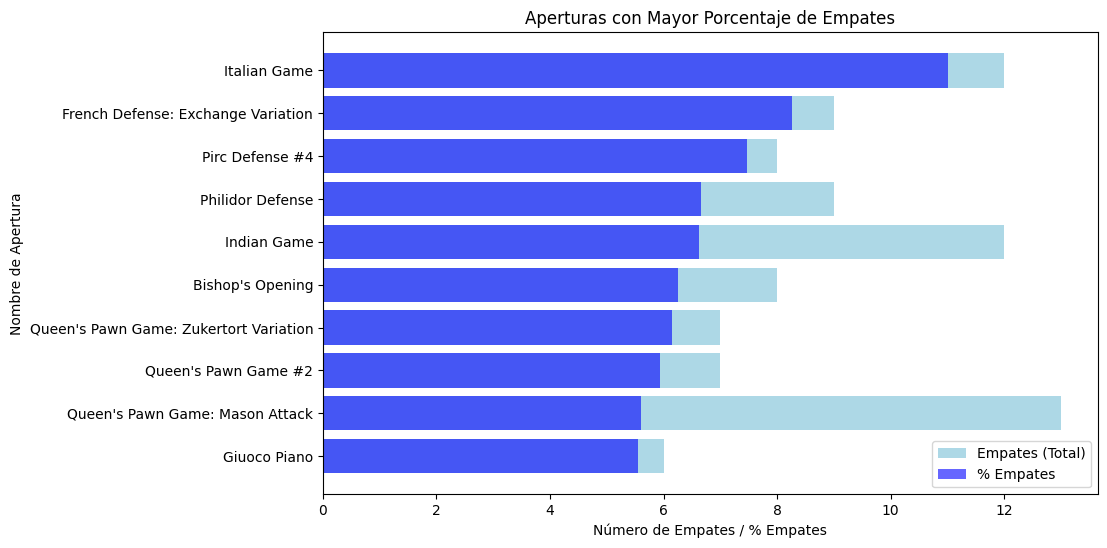

In [117]:
# Resultados por apertura
draw_counts = df.groupby("opening_name")["winner"].value_counts().unstack().fillna(0)

# Agrego la columna de total de partidas por apertura
draw_counts["total"] = draw_counts.sum(axis=1)

# Filtro solo aperturas con al menos 100 partidas jugadas
draw_counts = draw_counts[draw_counts["total"] >= 100]

# Porcentaje de empates
draw_counts["draw_pct"] = (draw_counts["draw"] / draw_counts["total"]) * 100

# Ordeno por mayor porcentaje de empates
top_draws = draw_counts.sort_values(by="draw_pct", ascending=False).head(10)

# Resultados
print("\n🔹 Aperturas con Mayor Porcentaje de Empates (≥100 partidas jugadas):")
print(top_draws[["draw", "total", "draw_pct"]])

# Grafico
plt.figure(figsize=(10, 6))
plt.barh(top_draws.index, top_draws["draw"], color="lightblue", label="Empates (Total)")
plt.barh(top_draws.index, top_draws["draw_pct"], color="blue", alpha=0.6, label="% Empates")
plt.xlabel("Número de Empates / % Empates")
plt.ylabel("Nombre de Apertura")
plt.title("Aperturas con Mayor Porcentaje de Empates")
plt.legend()
plt.gca().invert_yaxis()
plt.show()


<ipython-input-118-23b8d50cb451>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rating_by_opening.head(10), x="avg_rating", y="opening_name", palette="viridis")


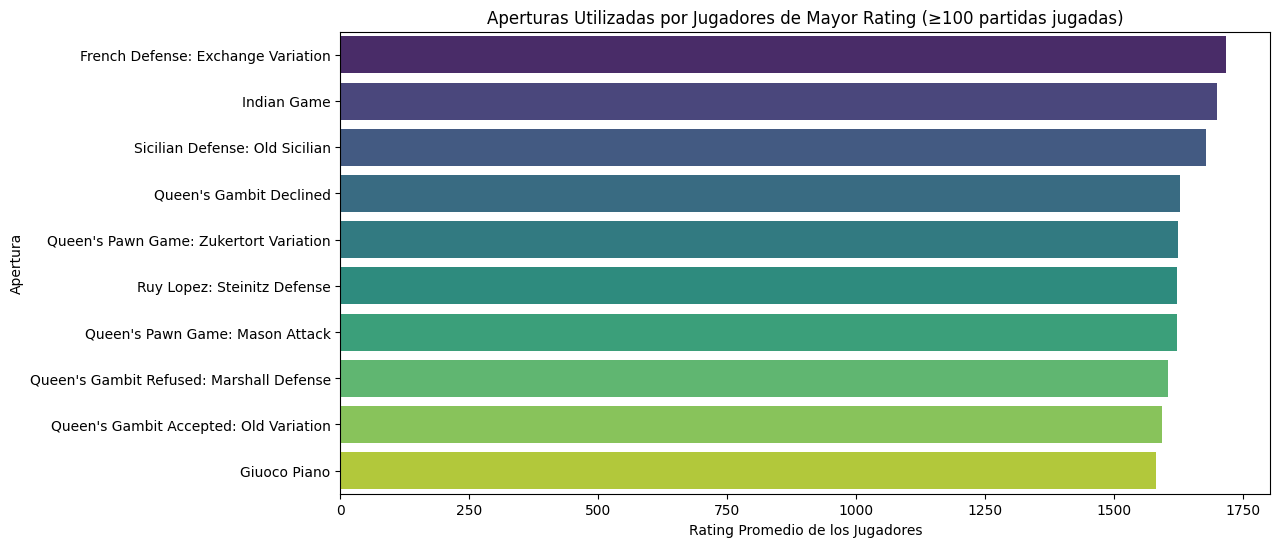

In [118]:


# Rating promedio de los jugadores en cada apertura
df["avg_rating"] = (df["white_rating"] + df["black_rating"]) / 2

# Agrupo por apertura y calcular el rating promedio
rating_by_opening = df.groupby("opening_name")["avg_rating"].mean().reset_index()

# Filtro las aperturas jugadas al menos 100 veces para evitar sesgos
opening_counts = df["opening_name"].value_counts()
popular_openings = opening_counts[opening_counts >= 100].index
rating_by_opening = rating_by_opening[rating_by_opening["opening_name"].isin(popular_openings)]

# De mayor a menor rating promedio
rating_by_opening = rating_by_opening.sort_values(by="avg_rating", ascending=False)

# Grafico
plt.figure(figsize=(12, 6))
sns.barplot(data=rating_by_opening.head(10), x="avg_rating", y="opening_name", palette="viridis")
plt.xlabel("Rating Promedio de los Jugadores")
plt.ylabel("Apertura")
plt.title("Aperturas Utilizadas por Jugadores de Mayor Rating (≥100 partidas jugadas)")
plt.show()


<ipython-input-119-5f8b10f2406c>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_win_counts = df.groupby('rating_category')['winner'].value_counts(normalize=True).unstack().fillna(0)


<Figure size 1000x500 with 0 Axes>

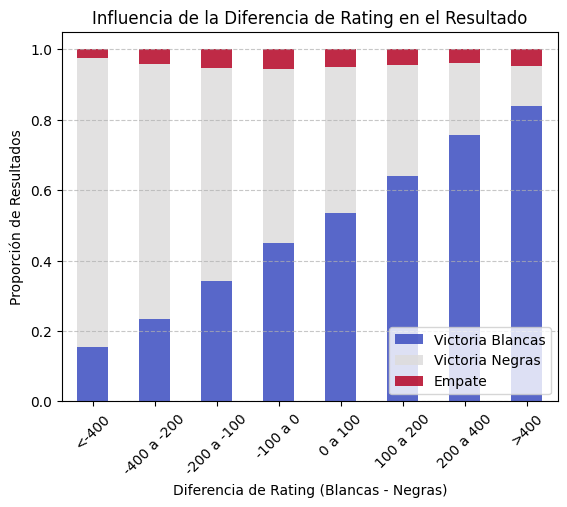

In [119]:
# Diferencia de rating
df['rating_diff'] = df['white_rating'] - df['black_rating']

# Creo las categorías de diferencia de rating
bins = [-1000, -400, -200, -100, 0, 100, 200, 400, 1000]
labels = ['<-400', '-400 a -200', '-200 a -100', '-100 a 0', '0 a 100', '100 a 200', '200 a 400', '>400']
df['rating_category'] = pd.cut(df['rating_diff'], bins=bins, labels=labels)

# Cuento las victorias por categoría
rating_win_counts = df.groupby('rating_category')['winner'].value_counts(normalize=True).unstack().fillna(0)

# Visualizamos
plt.figure(figsize=(10, 5))
rating_win_counts[['white', 'black', 'draw']].plot(kind='bar', stacked=True, colormap="coolwarm", alpha=0.85)
plt.title('Influencia de la Diferencia de Rating en el Resultado')
plt.xlabel('Diferencia de Rating (Blancas - Negras)')
plt.ylabel('Proporción de Resultados')
plt.legend(['Victoria Blancas', 'Victoria Negras', 'Empate'])
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


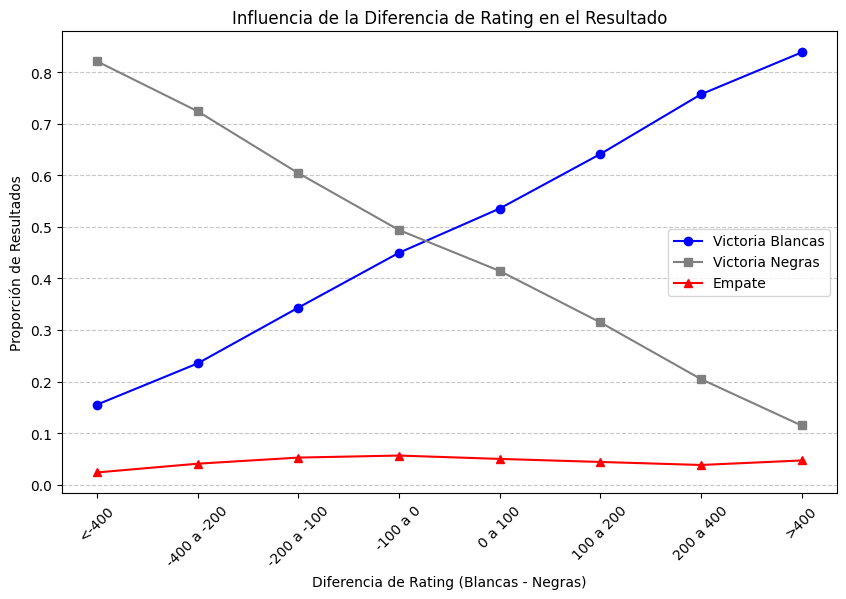

In [120]:
# Reseteo índice para acceder a los datos
rating_win_counts_reset = rating_win_counts.reset_index()

# Visualización de líneas para observar la tendencia
plt.figure(figsize=(10, 6))

plt.plot(rating_win_counts_reset['rating_category'], rating_win_counts_reset['white'], marker='o', linestyle='-', label='Victoria Blancas', color='blue')
plt.plot(rating_win_counts_reset['rating_category'], rating_win_counts_reset['black'], marker='s', linestyle='-', label='Victoria Negras', color='gray')
plt.plot(rating_win_counts_reset['rating_category'], rating_win_counts_reset['draw'], marker='^', linestyle='-', label='Empate', color='red')

# Mejora
plt.xlabel('Diferencia de Rating (Blancas - Negras)')
plt.ylabel('Proporción de Resultados')
plt.title('Influencia de la Diferencia de Rating en el Resultado')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.show()


<ipython-input-121-ec2d0450bf56>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_analysis = df.groupby("rating_diff_bin")["winner"].value_counts(normalize=True).unstack().fillna(0)


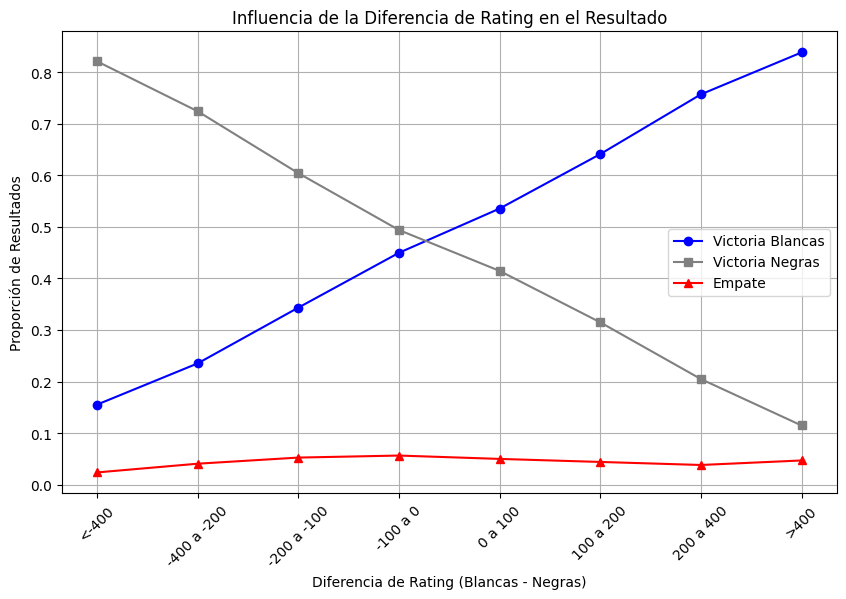

Umbrales donde el jugador con mayor rating tiene una victoria asegurada (≥80%):
winner              black      draw     white
rating_diff_bin                              
<-400            0.820911  0.023810  0.155280
>400             0.114828  0.047016  0.838156


In [121]:
# Columna con la diferencia de rating (Blancas - Negras)
df["rating_diff"] = df["white_rating"] - df["black_rating"]

# Rangos de diferencia de rating
bins = [-1000, -400, -200, -100, 0, 100, 200, 400, 1000]
labels = ["<-400", "-400 a -200", "-200 a -100", "-100 a 0", "0 a 100", "100 a 200", "200 a 400", ">400"]
df["rating_diff_bin"] = pd.cut(df["rating_diff"], bins=bins, labels=labels, include_lowest=True)

# Proporción de victorias en cada rango
rating_analysis = df.groupby("rating_diff_bin")["winner"].value_counts(normalize=True).unstack().fillna(0)

# Resultados
plt.figure(figsize=(10, 6))
plt.plot(rating_analysis.index, rating_analysis["white"], marker="o", linestyle="-", color="blue", label="Victoria Blancas")
plt.plot(rating_analysis.index, rating_analysis["black"], marker="s", linestyle="-", color="gray", label="Victoria Negras")
plt.plot(rating_analysis.index, rating_analysis["draw"], marker="^", linestyle="-", color="red", label="Empate")

plt.xlabel("Diferencia de Rating (Blancas - Negras)")
plt.ylabel("Proporción de Resultados")
plt.title("Influencia de la Diferencia de Rating en el Resultado")
plt.legend()
plt.grid()

# Gráfica
plt.xticks(rotation=45)
plt.show()

# Umbral donde la victoria del jugador con mayor rating supera el 80%
threshold = rating_analysis[(rating_analysis["white"] > 0.80) | (rating_analysis["black"] > 0.80)]
print("Umbrales donde el jugador con mayor rating tiene una victoria asegurada (≥80%):")
print(threshold)


<ipython-input-122-49d897018227>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


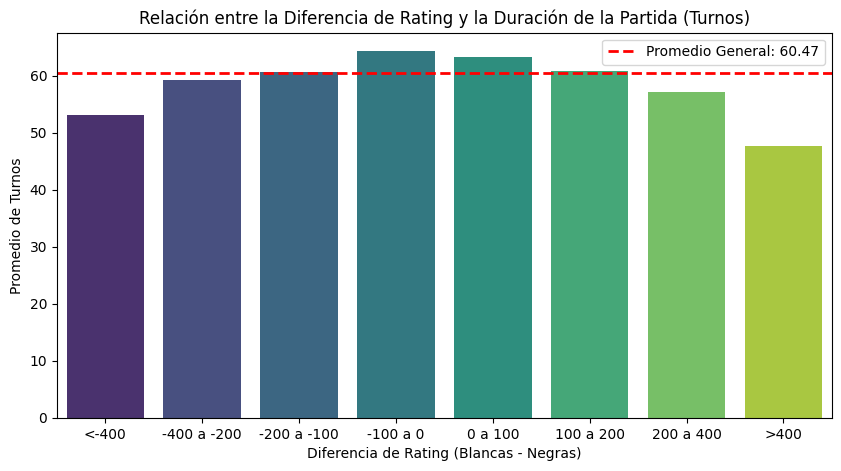

In [122]:
# Diferencia de rating (Blancas - Negras)
df['rating_diff'] = df['white_rating'] - df['black_rating']

# Intervalos de diferencia de rating
bins = [-1000, -400, -200, -100, 0, 100, 200, 400, 1000]
labels = ["<-400", "-400 a -200", "-200 a -100", "-100 a 0", "0 a 100", "100 a 200", "200 a 400", ">400"]
df['rating_diff_group'] = pd.cut(df['rating_diff'], bins=bins, labels=labels, ordered=True)

# Media del número de turnos por cada grupo de diferencia de rating
turns_stats = df.groupby('rating_diff_group', observed=False)['turns'].mean().reset_index()

# Media general de turnos en todas las partidas
mean_turns = df['turns'].mean()

# Grafico
plt.figure(figsize=(10,5))
sns.barplot(
    x=turns_stats['rating_diff_group'],
    y=turns_stats['turns'],
    palette="viridis"
)

# Línea horizontal con el promedio general de turnos
plt.axhline(mean_turns, color='red', linestyle='dashed', linewidth=2, label=f'Promedio General: {mean_turns:.2f}')

plt.xlabel("Diferencia de Rating (Blancas - Negras)")
plt.ylabel("Promedio de Turnos")
plt.title("Relación entre la Diferencia de Rating y la Duración de la Partida (Turnos)")

# Leyenda
plt.legend()

plt.show()


<ipython-input-123-047adf15cb60>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  turns_mean_by_rank = df.groupby("ranking_group")["turns"].mean()


ranking_group
Bajo (800-1400)      52.896601
Medio (1400-1800)    61.029590
Alto (1800-2200)     66.734830
Élite (2200-2700)    76.951852
Name: turns, dtype: float64


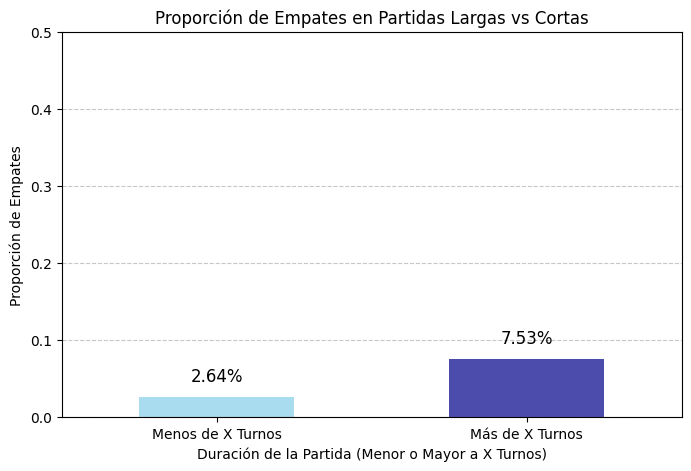

In [123]:
# Umbrales de ranking basados en percentiles
bins = [800, 1400, 1800, 2200, 2700]
labels = ["Bajo (800-1400)", "Medio (1400-1800)", "Alto (1800-2200)", "Élite (2200-2700)"]

# Columna con la clasificación de ranking promedio
df["rating_avg"] = (df["white_rating"] + df["black_rating"]) / 2
df["ranking_group"] = pd.cut(df["rating_avg"], bins=bins, labels=labels)

# Número medio de turnos por grupo de ranking
turns_mean_by_rank = df.groupby("ranking_group")["turns"].mean()
print(turns_mean_by_rank)

# Umbral X como el número medio de turnos en cada categoría de ranking
df["long_game"] = df.apply(lambda row: row["turns"] > turns_mean_by_rank[row["ranking_group"]], axis=1)

# Proporción de partidas que terminan en empate según la duración
resultados = df.groupby("long_game")["winner"].value_counts(normalize=True).unstack().fillna(0)

# Resultados
plt.figure(figsize=(8, 5))
resultados.loc[:, "draw"].plot(kind="bar", color=["skyblue", "darkblue"], alpha=0.7)

plt.xlabel("Duración de la Partida (Menor o Mayor a X Turnos)")
plt.ylabel("Proporción de Empates")
plt.title("Proporción de Empates en Partidas Largas vs Cortas")
plt.xticks(ticks=[0, 1], labels=["Menos de X Turnos", "Más de X Turnos"], rotation=0)
plt.ylim(0, 0.5)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Valores en las barras
for i, v in enumerate(resultados["draw"]):
    plt.text(i, v + 0.02, f"{v:.2%}", ha="center", fontsize=12)

plt.show()


<ipython-input-124-703c83574c2d>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  turns_mean_by_rank = df.groupby("ranking_group")["turns"].mean()
<ipython-input-124-703c83574c2d>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  draw_rates = df.groupby(["ranking_group", "long_game"])["winner"].value_counts(normalize=True).unstack().fillna(0)


<Figure size 1000x500 with 0 Axes>

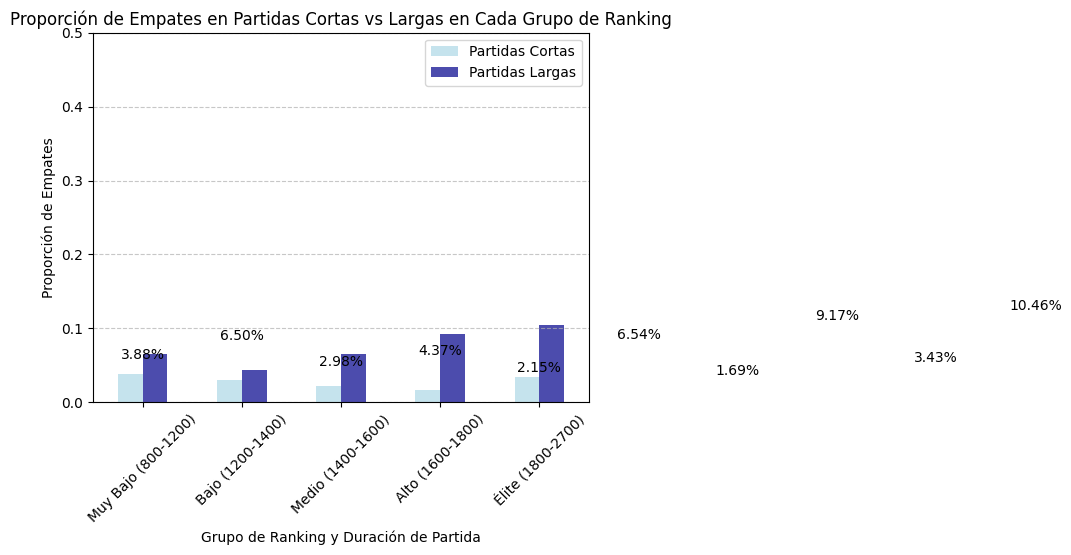

In [124]:
# Umbrales de ranking basados en percentiles
bins = [800, 1200, 1400, 1600, 1800, 2700]  # Dividimos en 5 partes
labels = ["Muy Bajo (800-1200)", "Bajo (1200-1400)", "Medio (1400-1600)", "Alto (1600-1800)", "Élite (1800-2700)"]

# Clasificación de ranking promedio
df["rating_avg"] = (df["white_rating"] + df["black_rating"]) / 2
df["ranking_group"] = pd.cut(df["rating_avg"], bins=bins, labels=labels)

# Número medio de turnos por grupo de ranking
turns_mean_by_rank = df.groupby("ranking_group")["turns"].mean()

# Umbral X para cada grupo de ranking
df["long_game"] = df.apply(lambda row: row["turns"] > turns_mean_by_rank[row["ranking_group"]], axis=1)

# Proporción de partidas que terminan en empate según la duración para cada grupo de ranking
draw_rates = df.groupby(["ranking_group", "long_game"])["winner"].value_counts(normalize=True).unstack().fillna(0)

# Gráfico para comparar la proporción de empates en cada grupo de ranking
plt.figure(figsize=(10, 5))

# Grafico las proporciones de empate para partidas largas y cortas
draw_rates.loc[:, "draw"].unstack().plot(kind="bar", color=["lightblue", "darkblue"], alpha=0.7)

plt.xlabel("Grupo de Ranking y Duración de Partida")
plt.ylabel("Proporción de Empates")
plt.title("Proporción de Empates en Partidas Cortas vs Largas en Cada Grupo de Ranking")
plt.xticks(rotation=45)
plt.ylim(0, 0.5)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Valores en las barras
for i, v in enumerate(draw_rates["draw"].unstack().values.flatten()):
    plt.text(i, v + 0.02, f"{v:.2%}", ha="center", fontsize=10)

plt.legend(["Partidas Cortas", "Partidas Largas"])
plt.show()


<ipython-input-125-73bed9a559f3>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  turns_mean_by_rank = df.groupby("ranking_group")["turns"].mean()
<ipython-input-125-73bed9a559f3>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  draw_rates = df.groupby(["ranking_group", "long_game"])["winner"].value_counts(normalize=True).unstack().fillna(0)


<Figure size 1000x500 with 0 Axes>

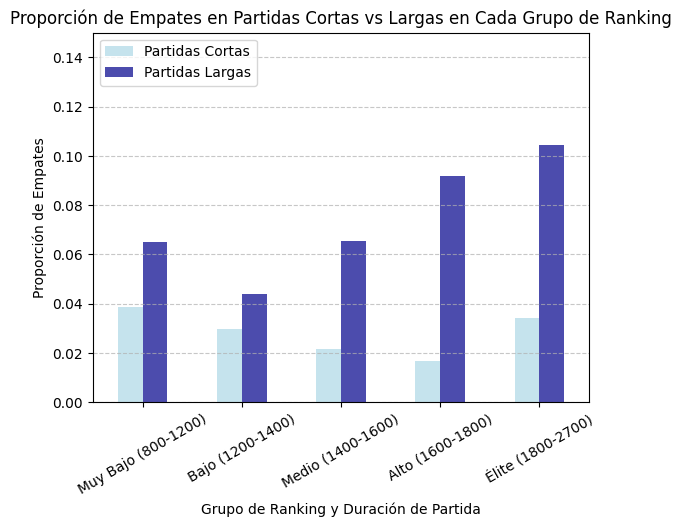

In [125]:
# Umbrales de ranking basados en percentiles
bins = [800, 1200, 1400, 1600, 1800, 2700]
labels = ["Muy Bajo (800-1200)", "Bajo (1200-1400)", "Medio (1400-1600)", "Alto (1600-1800)", "Élite (1800-2700)"]

# Columna con la clasificación de ranking promedio
df["rating_avg"] = (df["white_rating"] + df["black_rating"]) / 2
df["ranking_group"] = pd.cut(df["rating_avg"], bins=bins, labels=labels)

# Número medio de turnos por grupo de ranking
turns_mean_by_rank = df.groupby("ranking_group")["turns"].mean()

# Umbral X para cada grupo de ranking
df["long_game"] = df.apply(lambda row: row["turns"] > turns_mean_by_rank[row["ranking_group"]], axis=1)

# Proporción de partidas que terminan en empate según la duración para cada grupo de ranking
draw_rates = df.groupby(["ranking_group", "long_game"])["winner"].value_counts(normalize=True).unstack().fillna(0)

# Gráfico para comparar la proporción de empates en cada grupo de ranking
plt.figure(figsize=(10, 5))

# Grafico las proporciones de empate para partidas largas y cortas
draw_rates.loc[:, "draw"].unstack().plot(kind="bar", color=["lightblue", "darkblue"], alpha=0.7)

plt.xlabel("Grupo de Ranking y Duración de Partida")
plt.ylabel("Proporción de Empates")
plt.title("Proporción de Empates en Partidas Cortas vs Largas en Cada Grupo de Ranking")
plt.xticks(rotation=30)
plt.ylim(0, 0.15)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Elimino valores numéricos flotantes sobre las barras
plt.legend(["Partidas Cortas", "Partidas Largas"], loc="upper left")

plt.show()


<ipython-input-126-6f357b89b2f0>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="rating_group", y="mean", data=turns_stats, palette="viridis")


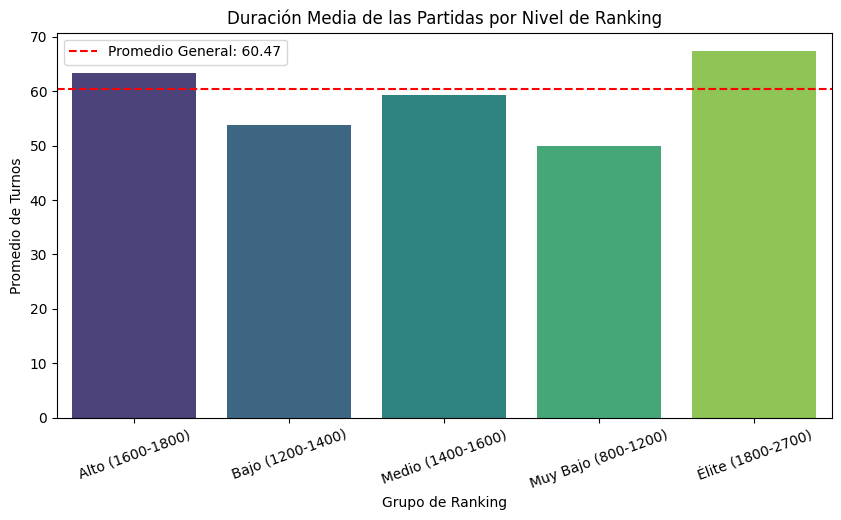

In [126]:
# Primero defino los grupos de ranking
def categorize_rating(rating):
    if rating < 1200:
        return "Muy Bajo (800-1200)"
    elif rating < 1400:
        return "Bajo (1200-1400)"
    elif rating < 1600:
        return "Medio (1400-1600)"
    elif rating < 1800:
        return "Alto (1600-1800)"
    else:
        return "Élite (1800-2700)"

# Columna de grupo de ranking basada en el rating promedio de los jugadores
df["rating_avg"] = (df["white_rating"] + df["black_rating"]) / 2
df["rating_group"] = df["rating_avg"].apply(categorize_rating)

# Duración media de la partida por grupo de ranking
turns_stats = df.groupby("rating_group")["turns"].agg(["mean", "std"]).reset_index()

# Visualización de la duración media de las partidas por nivel de ranking
plt.figure(figsize=(10,5))
sns.barplot(x="rating_group", y="mean", data=turns_stats, palette="viridis")

# Etiquetas y título
plt.xlabel("Grupo de Ranking")
plt.ylabel("Promedio de Turnos")
plt.title("Duración Media de las Partidas por Nivel de Ranking")

# Línea horizontal
avg_turns = df["turns"].mean()
plt.axhline(avg_turns, color='red', linestyle='dashed', label=f"Promedio General: {avg_turns:.2f}")
plt.legend()

plt.xticks(rotation=20)
plt.show()


<ipython-input-127-a52892fd44f5>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unrated_counts = df[df["rated"] == False].groupby("rating_group").size()
<ipython-input-127-a52892fd44f5>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unrated_counts.index, y=unrated_counts.values, palette="magma")


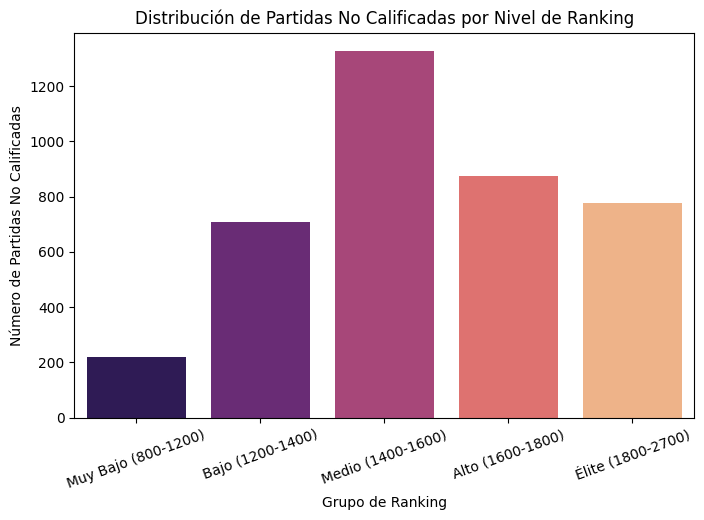

In [127]:
# Jugadores por niveles de rating
rating_bins = [800, 1200, 1400, 1600, 1800, 2700]
rating_labels = ["Muy Bajo (800-1200)", "Bajo (1200-1400)", "Medio (1400-1600)", "Alto (1600-1800)", "Élite (1800-2700)"]

# Calculo el promedio de rating entre blanco y negro para cada partida
df["rating_avg"] = (df["white_rating"] + df["black_rating"]) / 2

# Nueva columna de grupos de rating
df["rating_group"] = pd.cut(df["rating_avg"], bins=rating_bins, labels=rating_labels)

# Cuento solo las partidas NO CALIFICADAS
unrated_counts = df[df["rated"] == False].groupby("rating_group").size()

# Grafico
plt.figure(figsize=(8,5))
sns.barplot(x=unrated_counts.index, y=unrated_counts.values, palette="magma")

plt.xlabel("Grupo de Ranking")
plt.ylabel("Número de Partidas No Calificadas")
plt.title("Distribución de Partidas No Calificadas por Nivel de Ranking")
plt.xticks(rotation=20)

# Gráfica
plt.show()


<ipython-input-128-d4e11649c409>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=increment_counts.index, y=increment_counts.values, palette="viridis")


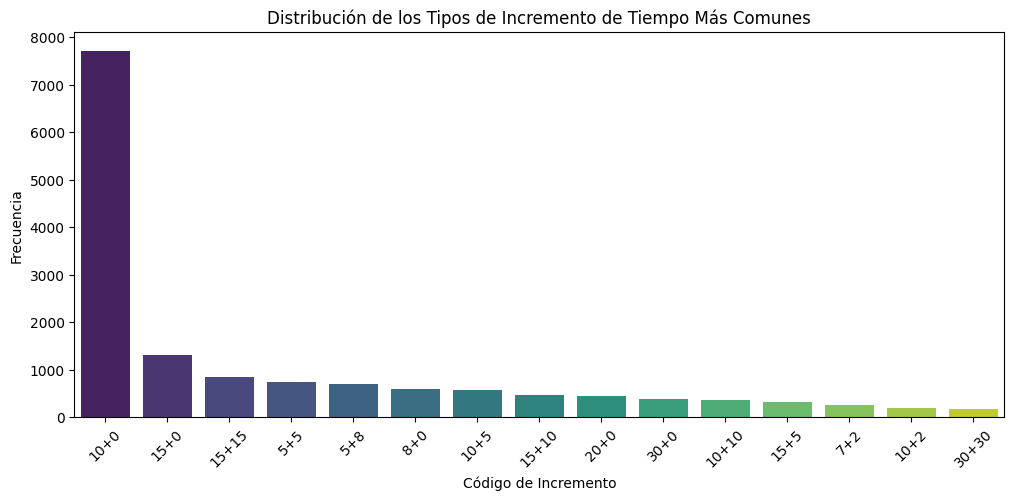

<ipython-input-128-d4e11649c409>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=turns_by_increment.index, y=turns_by_increment.values, palette="magma")


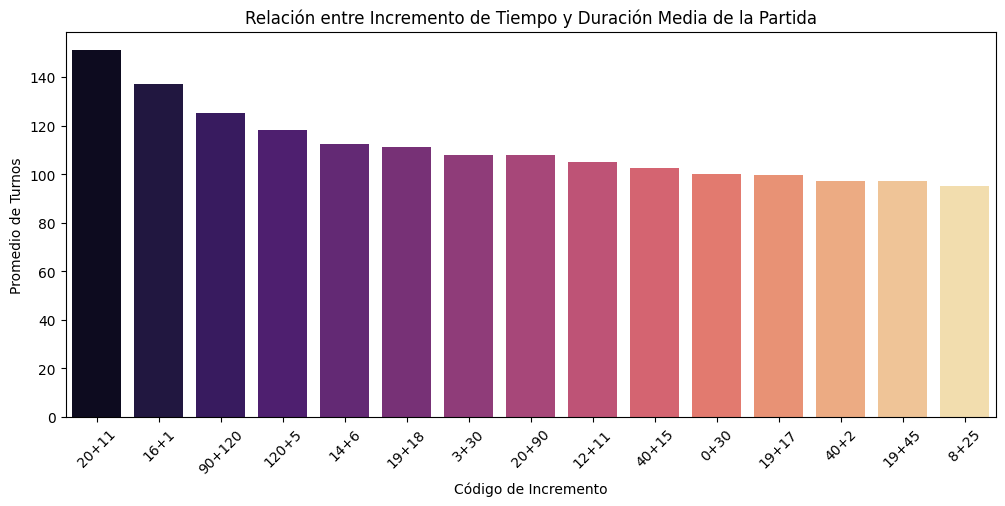

<ipython-input-128-d4e11649c409>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_by_increment.index, y=rating_by_increment.values, palette="coolwarm")


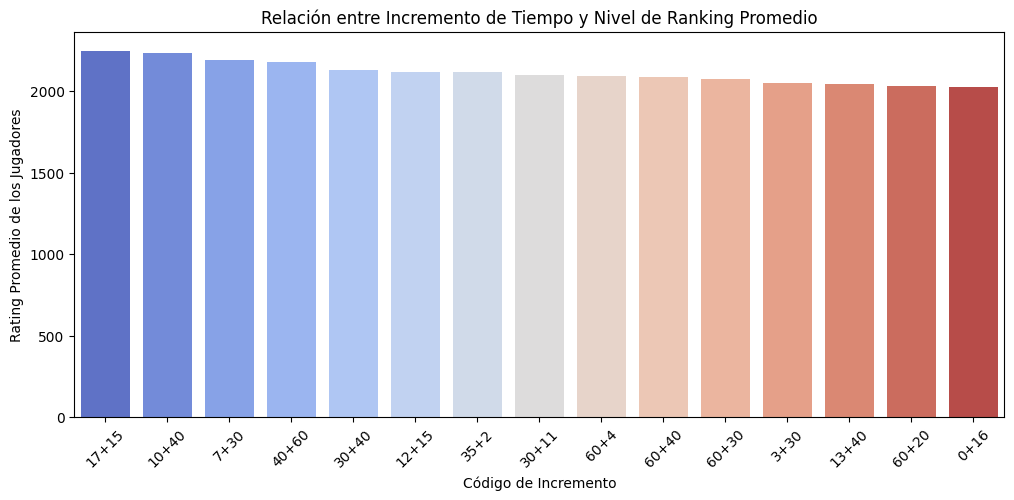

In [128]:
# 1️⃣ Frecuencia de cada incremento de tiempo
increment_counts = df['increment_code'].value_counts().head(15)  # Tomamos los 15 más comunes

# 📊 Distribución de los incrementos de tiempo más utilizados
plt.figure(figsize=(12, 5))
sns.barplot(x=increment_counts.index, y=increment_counts.values, palette="viridis")
plt.xlabel("Código de Incremento")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Tipos de Incremento de Tiempo Más Comunes")
plt.xticks(rotation=45)
plt.show()

# 2️⃣ Relación entre incremento de tiempo y duración de la partida
turns_by_increment = df.groupby("increment_code")["turns"].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 5))
sns.barplot(x=turns_by_increment.index, y=turns_by_increment.values, palette="magma")
plt.xlabel("Código de Incremento")
plt.ylabel("Promedio de Turnos")
plt.title("Relación entre Incremento de Tiempo y Duración Media de la Partida")
plt.xticks(rotation=45)
plt.show()

# 3️⃣ Relación entre incremento de tiempo y rating promedio
df['rating_avg'] = (df['white_rating'] + df['black_rating']) / 2  # Calculamos el rating promedio por partida
rating_by_increment = df.groupby("increment_code")["rating_avg"].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 5))
sns.barplot(x=rating_by_increment.index, y=rating_by_increment.values, palette="coolwarm")
plt.xlabel("Código de Incremento")
plt.ylabel("Rating Promedio de los Jugadores")
plt.title("Relación entre Incremento de Tiempo y Nivel de Ranking Promedio")
plt.xticks(rotation=45)
plt.show()


<Figure size 1500x1000 with 0 Axes>

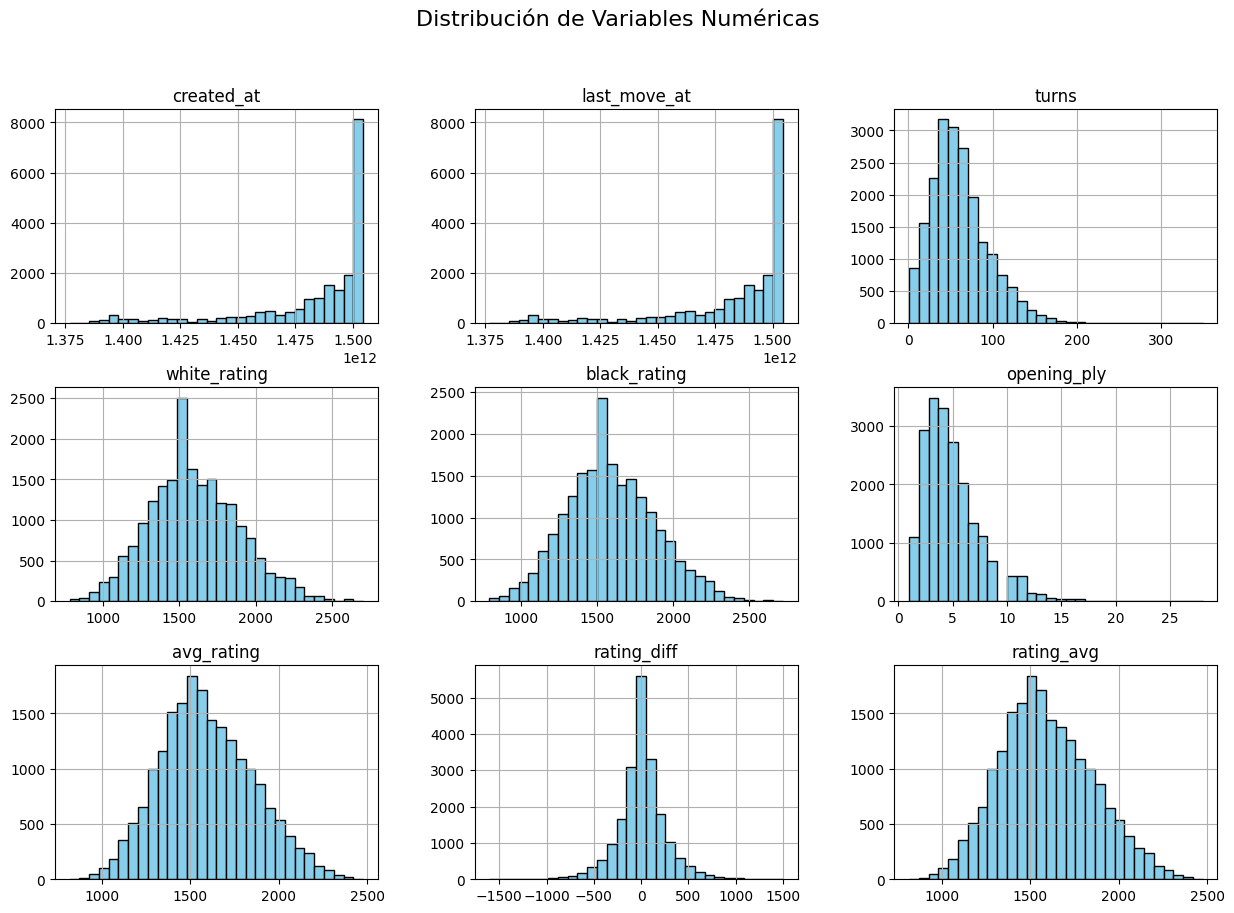

<ipython-input-129-67d1ebbc03d6>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numeric[col], shade=True, color="blue")
<ipython-input-129-67d1ebbc03d6>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numeric[col], shade=True, color="blue")
<ipython-input-129-67d1ebbc03d6>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numeric[col], shade=True, color="blue")
<ipython-input-129-67d1ebbc03d6>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_numeric[col], shade=True, color="blue")


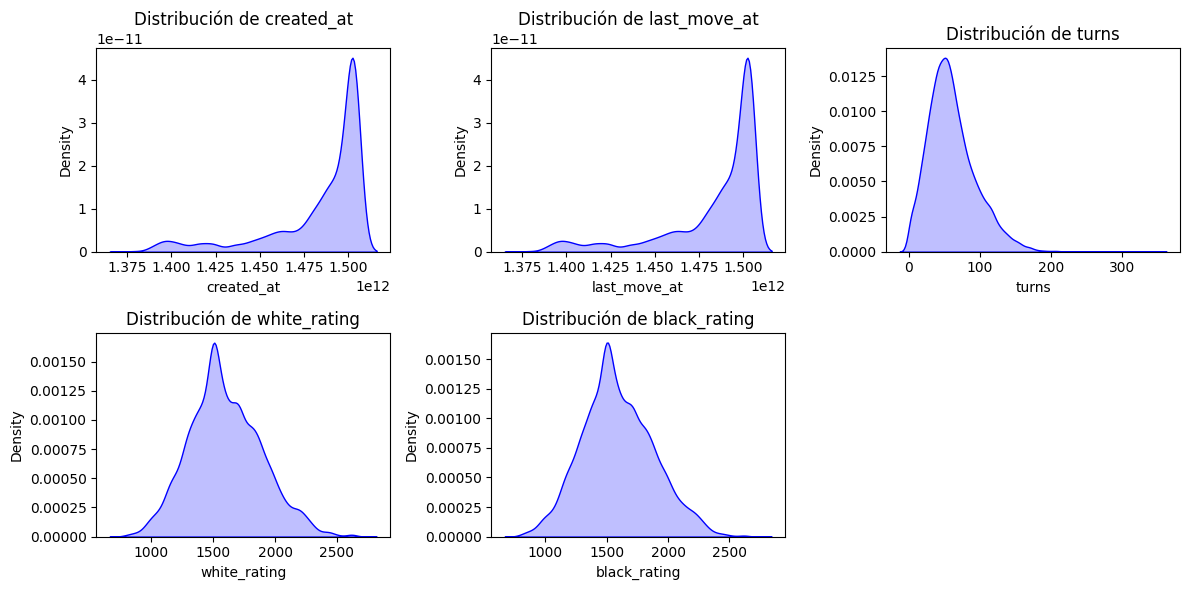

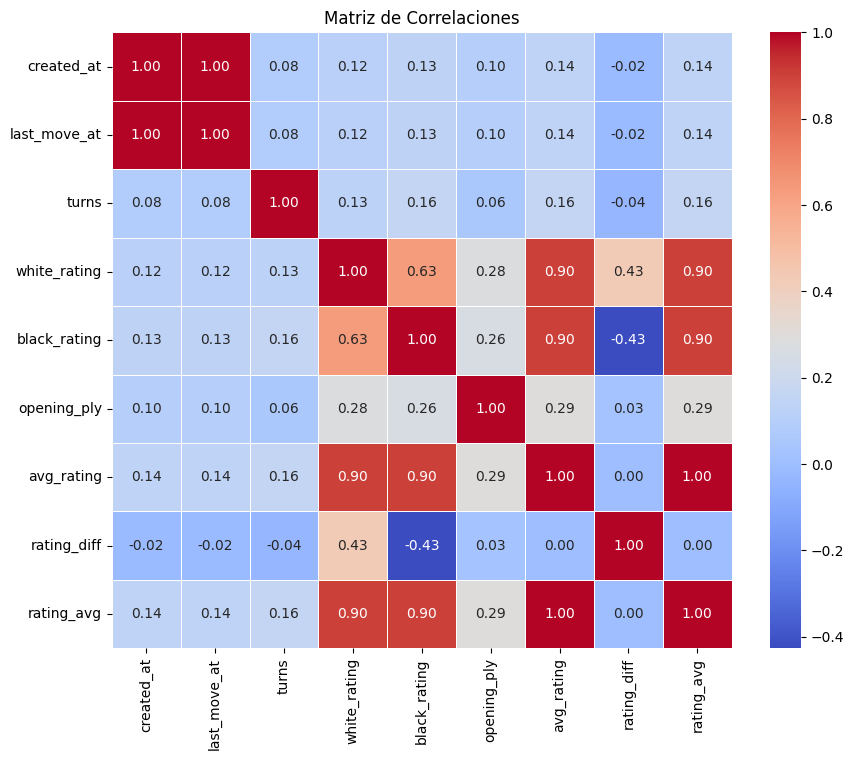

In [129]:
# Columnas numéricas para el análisis
df_numeric = df.select_dtypes(include=[np.number])

# Histogramas de cada variable numérica
plt.figure(figsize=(15, 10))
df_numeric.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribución de Variables Numéricas", fontsize=16)
plt.show()

# Distribuciones individuales con KDE para algunas variables clave
plt.figure(figsize=(12, 6))
for i, col in enumerate(df_numeric.columns[:5]):  # Seleccionamos las primeras 5 variables como ejemplo
    plt.subplot(2, 3, i + 1)
    sns.kdeplot(df_numeric[col], shade=True, color="blue")
    plt.title(f"Distribución de {col}")
plt.tight_layout()
plt.show()

# Calculo y muestro la matriz de correlaciones
plt.figure(figsize=(10, 8))
corr_matrix = df_numeric.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Matriz de Correlaciones")
plt.show()

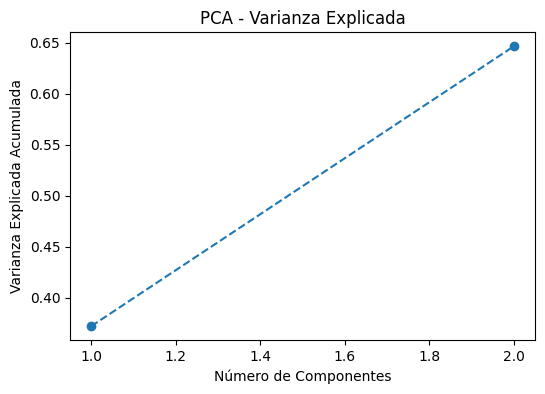

In [130]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Variables numéricas para PCA (sin incluir las categóricas ni ID)
numeric_features = ["white_rating", "black_rating", "turns", "opening_ply", "rating_diff"]

# Escalo los datos antes de PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_features])

# Aplicar PCA
pca = PCA(n_components=2)  # Reducimos a 2 dimensiones para visualización
pca_data = pca.fit_transform(scaled_data)

# Creo un DataFrame con las componentes principales
df_pca = pd.DataFrame(pca_data, columns=["PC1", "PC2"])

# Agrego de vuelta las etiquetas relevantes
df_pca["opening_name"] = df["opening_name"]  # Si quieres analizar aperturas
df_pca["rating_avg"] = df[["white_rating", "black_rating"]].mean(axis=1)

# Visualización
import matplotlib.pyplot as plt
import numpy as np

explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(6,4))
plt.plot(range(1, 3), explained_variance, marker='o', linestyle='--')
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Explicada Acumulada")
plt.title("PCA - Varianza Explicada")
plt.show()


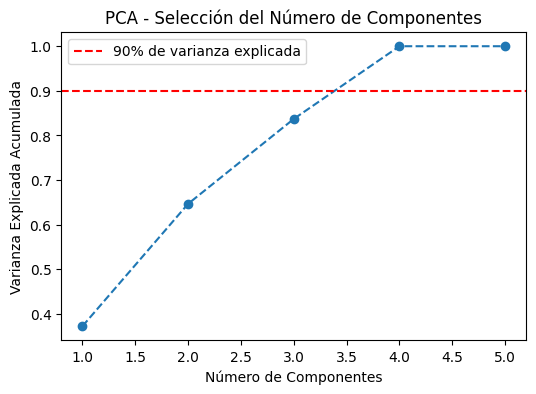

In [131]:
pca_full = PCA()
pca_full.fit(scaled_data)

explained_variance_full = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(6,4))
plt.plot(range(1, len(explained_variance_full)+1), explained_variance_full, marker='o', linestyle='--')
plt.axhline(y=0.9, color='r', linestyle='--', label="90% de varianza explicada")
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Explicada Acumulada")
plt.title("PCA - Selección del Número de Componentes")
plt.legend()
plt.show()


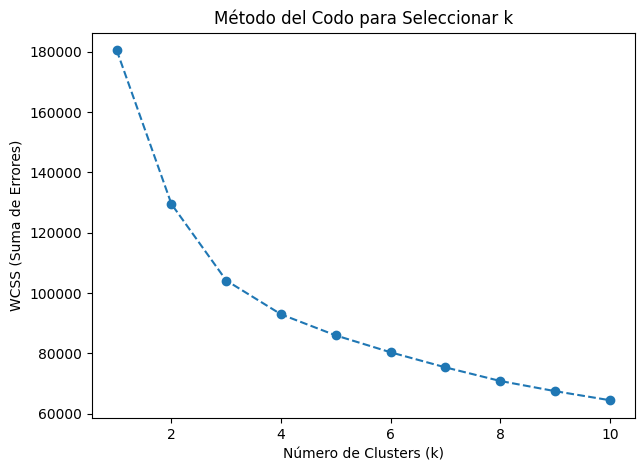

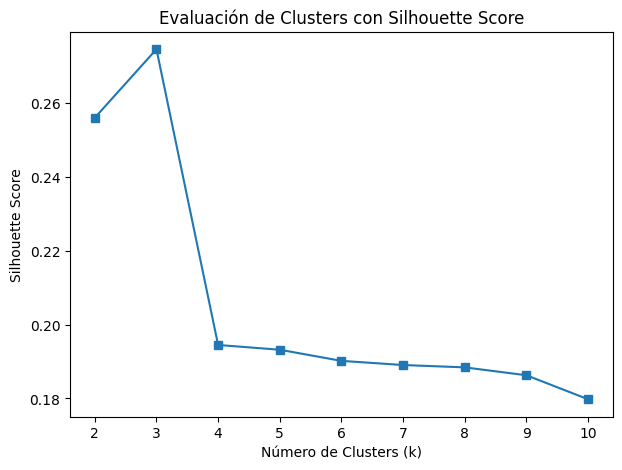

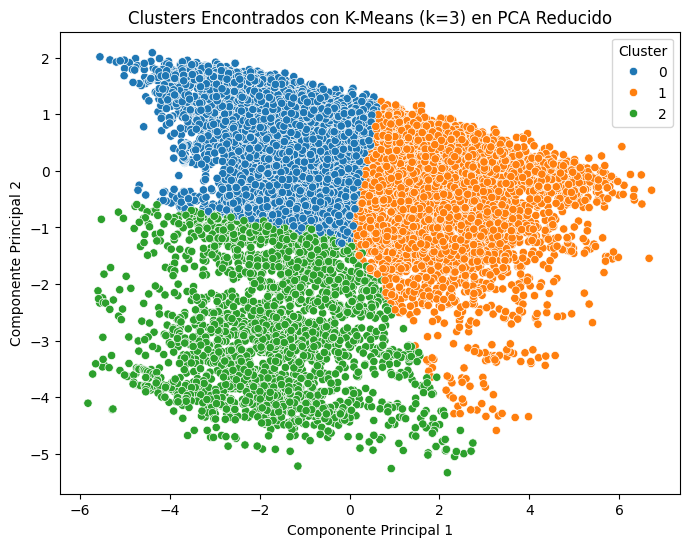

In [132]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 🔹 1. Solo tomo las columnas numéricas antes de escalar
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_cols]

# 🔹 2. Aplicar StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)


# 🔹 2. Método del Codo para elegir el número óptimo de clusters
wcss = []  # Within-Cluster Sum of Squares (Suma de errores dentro del cluster)
K_range = range(1, 11)  # Pruebo de 1 a 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Inercia: medida de cohesión dentro de los clusters tomados

# 📊 Visualizo el método del codo
plt.figure(figsize=(7,5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel("Número de Clusters (k)")
plt.ylabel("WCSS (Suma de Errores)")
plt.title("Método del Codo para Seleccionar k")
plt.show()

# 🔹 3. Evaluación con el Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# 📊 Visualizo el Silhouette Score
plt.figure(figsize=(7,5))
plt.plot(range(2, 11), silhouette_scores, marker='s', linestyle='-')
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Evaluación de Clusters con Silhouette Score")
plt.show()

# 🔹 4. Aplicar K-Means con el número óptimo de clusters encontrado
optimal_k = np.argmax(silhouette_scores) + 2
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans_final.fit_predict(X_scaled)

# 📊 Visualización de Clusters en 2D con PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["Cluster"] = df["Cluster"]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Cluster", palette="tab10")
plt.title(f"Clusters Encontrados con K-Means (k={optimal_k}) en PCA Reducido")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.show()


id                     object
rated                    bool
created_at            float64
last_move_at          float64
turns                   int64
victory_status         object
winner                 object
increment_code         object
white_id               object
white_rating            int64
black_id               object
black_rating            int64
moves                  object
opening_eco            object
opening_name           object
opening_ply             int64
rating_group         category
avg_rating            float64
rating_diff             int64
rating_category      category
rating_diff_bin      category
rating_diff_group    category
rating_avg            float64
ranking_group        category
long_game                bool
Cluster                 int32
dtype: object


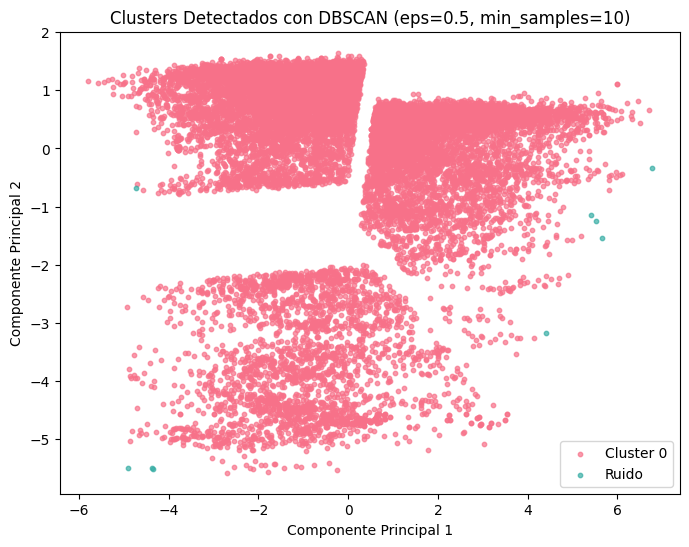

In [133]:
from sklearn.cluster import DBSCAN

# Verifico los tipos de datos
print(df.dtypes)

# Filtro solo columnas numéricas
df_numeric = df.select_dtypes(include=['number'])

# Compruebo si hay valores NaN y reemplazarlos si es necesario
df_numeric = df_numeric.fillna(df_numeric.mean())

# Normalizo los datos para DBSCAN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

# Aplico PCA para reducción de dimensionalidad
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Aplicamos DBSCAN
eps_value = 0.5
min_samples_value = 10
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
clusters = dbscan.fit_predict(X_pca)

# Visualización de Clusters de DBSCAN
plt.figure(figsize=(8, 6))
unique_clusters = set(clusters)
colors = sns.color_palette("husl", len(unique_clusters))

for cluster, color in zip(unique_clusters, colors):
    mask = clusters == cluster
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=f"Cluster {cluster}" if cluster != -1 else "Ruido", s=10, alpha=0.7, color=color)

plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title(f"Clusters Detectados con DBSCAN (eps={eps_value}, min_samples={min_samples_value})")
plt.legend()
plt.show()


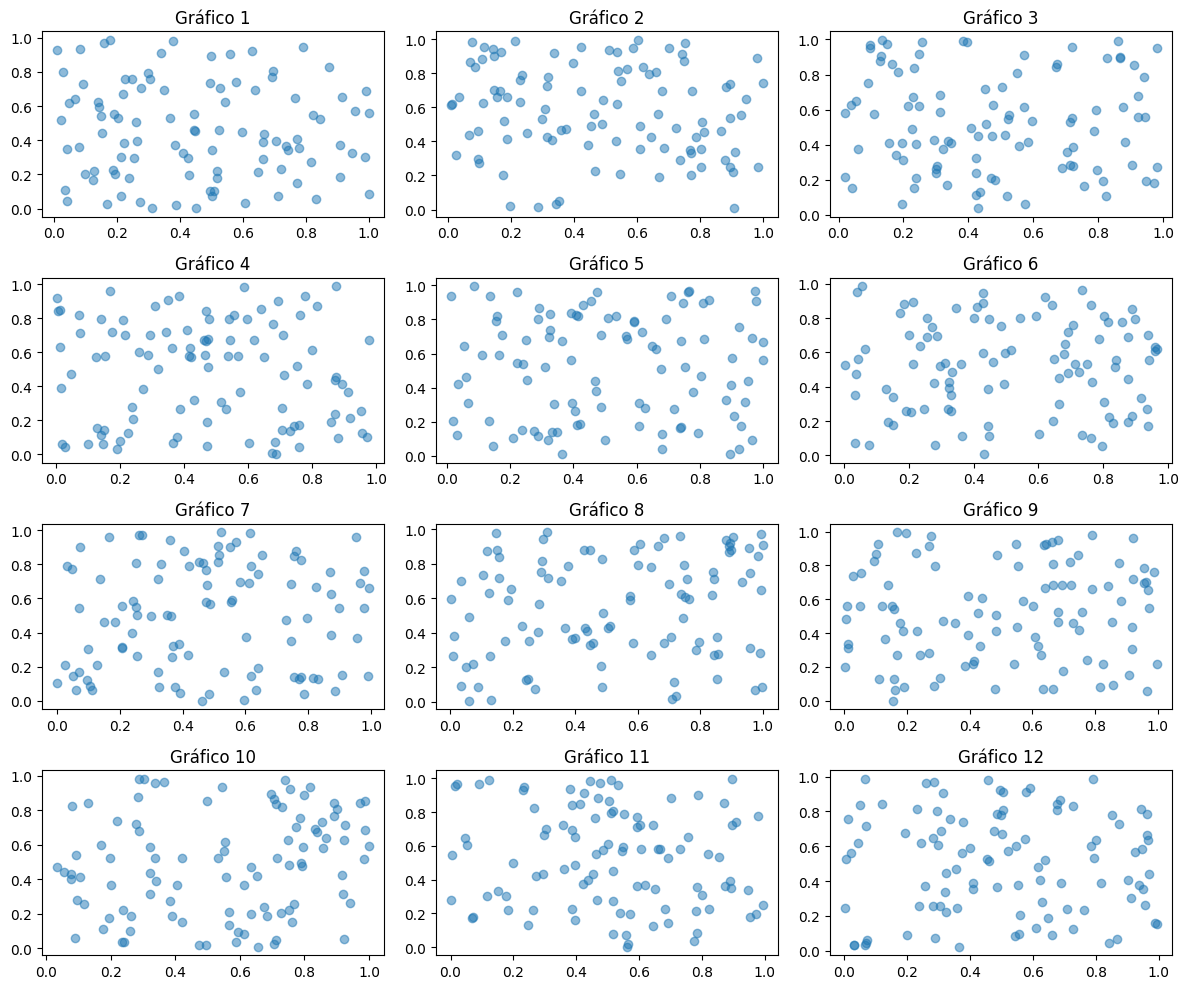

In [134]:
# Simulamos datos diferentes para cada gráfico
num_subplots = 12
data = [np.random.rand(100, 2) for _ in range(num_subplots)]

fig, axes = plt.subplots(4, 3, figsize=(12, 10))

# Aplanamos el array de ejes para iterar sobre él fácilmente
axes = axes.ravel()

for i, ax in enumerate(axes):
    ax.scatter(data[i][:, 0], data[i][:, 1], alpha=0.5)
    ax.set_title(f"Gráfico {i+1}")

plt.tight_layout()
plt.show()


In [135]:
print(df.columns)


Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply',
       'rating_group', 'avg_rating', 'rating_diff', 'rating_category',
       'rating_diff_bin', 'rating_diff_group', 'rating_avg', 'ranking_group',
       'long_game', 'Cluster'],
      dtype='object')


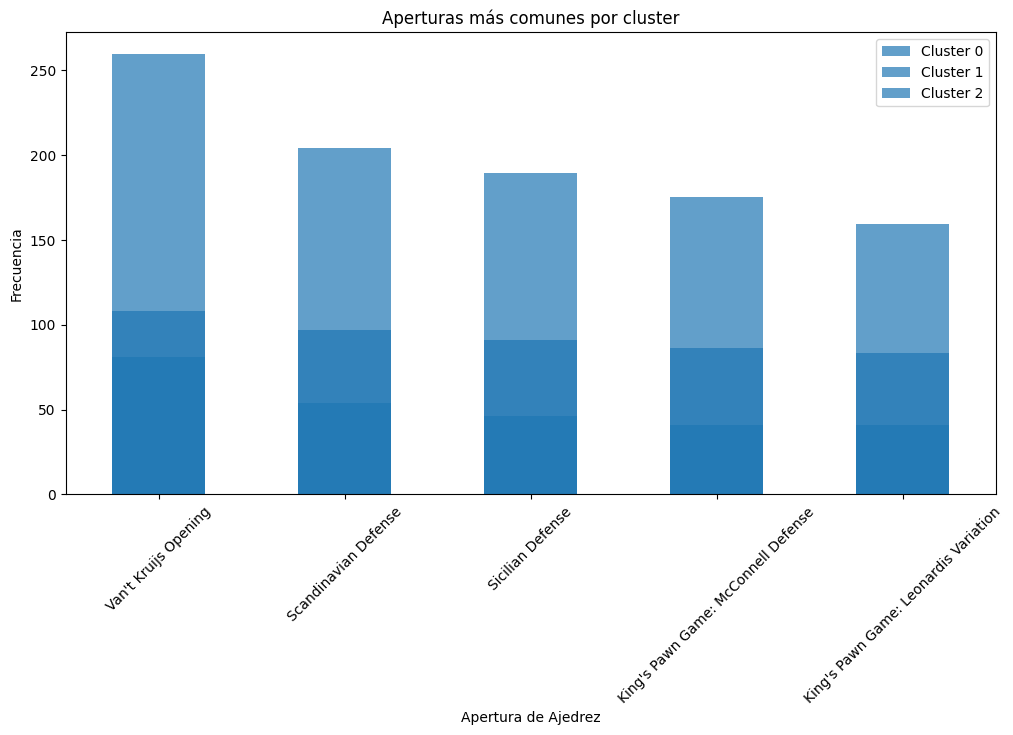

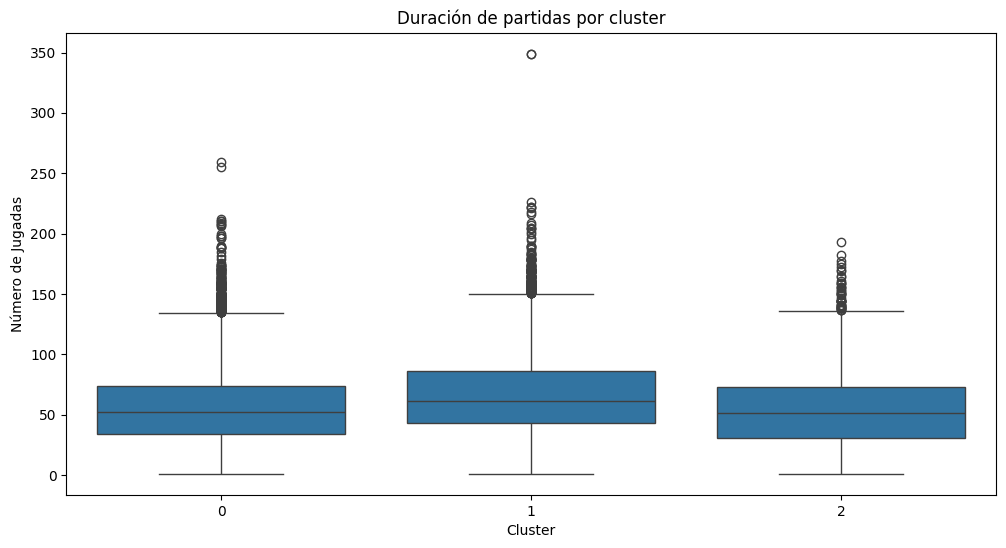

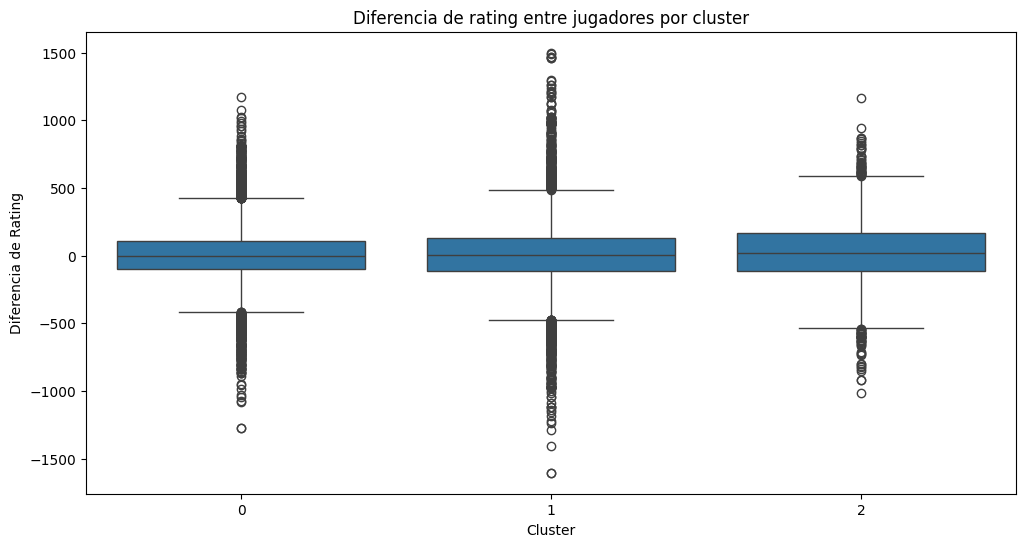

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Analizamos la distribución de aperturas más frecuentes por cluster
plt.figure(figsize=(12, 6))
for cluster in df['Cluster'].unique():
    subset = df[df['Cluster'] == cluster]['opening_name'].value_counts().head(5)  # Top 5 aperturas por cluster
    subset.plot(kind='bar', alpha=0.7, label=f'Cluster {cluster}')

plt.xlabel("Apertura de Ajedrez")
plt.ylabel("Frecuencia")
plt.title("Aperturas más comunes por cluster")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Análisis de la duración de partidas en cada cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='turns', data=df)
plt.xlabel("Cluster")
plt.ylabel("Número de Jugadas")
plt.title("Duración de partidas por cluster")
plt.show()

# Análisis de la diferencia de rating entre jugadores en cada cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='rating_diff', data=df)
plt.xlabel("Cluster")
plt.ylabel("Diferencia de Rating")
plt.title("Diferencia de rating entre jugadores por cluster")
plt.show()



         id  rated    created_at  last_move_at  turns victory_status winner  \
0  TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime  white   
1  l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign  black   
2  mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate  white   
3  kWKvrqYL   True  1.504110e+12  1.504110e+12     61           mate  white   
4  9tXo1AUZ   True  1.504030e+12  1.504030e+12     95           mate  white   

  increment_code       white_id  white_rating  ...       rating_group  \
0           15+2       bourgris          1500  ...   Bajo (1200-1400)   
1           5+10           a-00          1322  ...   Bajo (1200-1400)   
2           5+10         ischia          1496  ...  Medio (1400-1600)   
3           20+0  daniamurashov          1439  ...  Medio (1400-1600)   
4           30+3      nik221107          1523  ...  Medio (1400-1600)   

   avg_rating rating_diff rating_category rating_diff_bin  rating_diff_group  \
0     

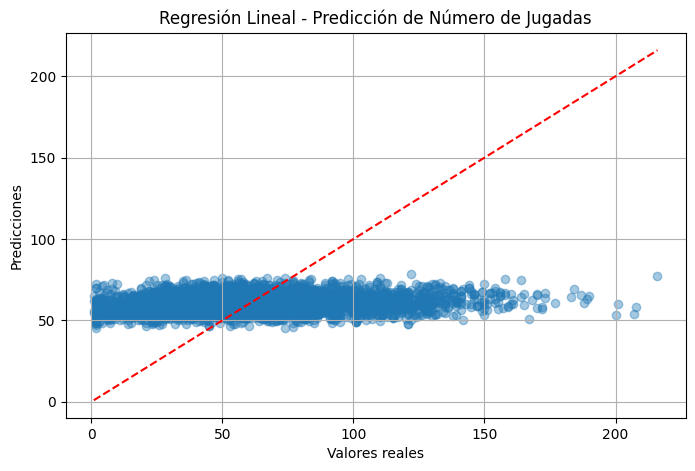

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Previsualizo
print(df.head())
print(df.info())

# Selecciono variables
features = ['white_rating', 'black_rating', 'opening_ply']
target = 'turns'

df_model = df[features + [target]].dropna()

# Escalo características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_model[features])
y = df_model[target]

# Separo en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Creo y entreno el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio (MSE): {mse:.2f}')
print(f'Coeficiente de Determinación (R²): {r2:.2f}')

# Visualización
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Regresión Lineal - Predicción de Número de Jugadas')
plt.grid(True)
plt.show()


Error Cuadrático Medio (MSE): 1003.70
Coeficiente de Determinación (R²): 0.11


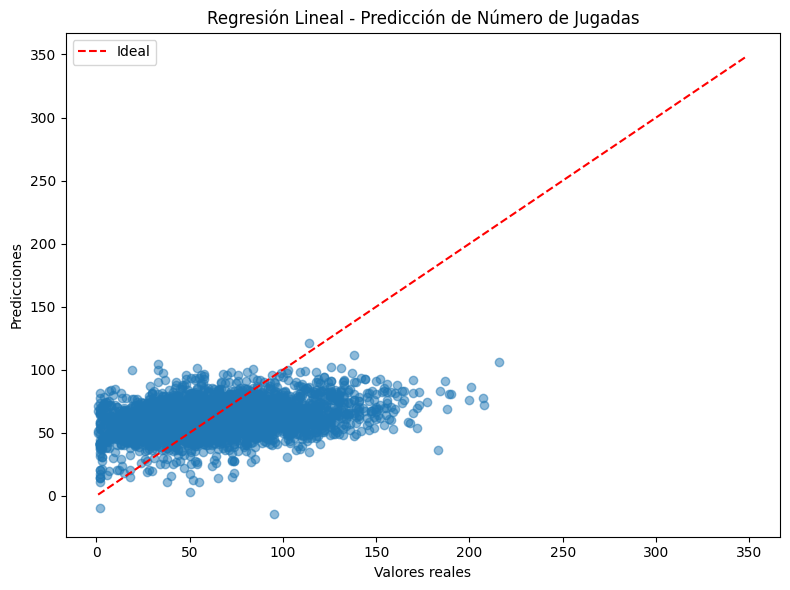

In [138]:
# Creo la variable rating_diff si no existe
if 'rating_diff' not in df.columns:
    df['rating_diff'] = df['white_rating'] - df['black_rating']

# Selecciono columnas relevantes
cols = ['white_rating', 'black_rating', 'rating_diff', 'victory_status', 'increment_code', 'rated', 'turns']
df = df[cols].dropna()

# Codifico variables categóricas con pocas categorías
df = pd.get_dummies(df, columns=['victory_status', 'increment_code'], drop_first=True)

# Separar X e y
X = df.drop(columns='turns')
y = df['turns']

# Escalo los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divido en train y test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")

# Visualización
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal')
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Regresión Lineal - Predicción de Número de Jugadas")
plt.legend()
plt.tight_layout()
plt.show()


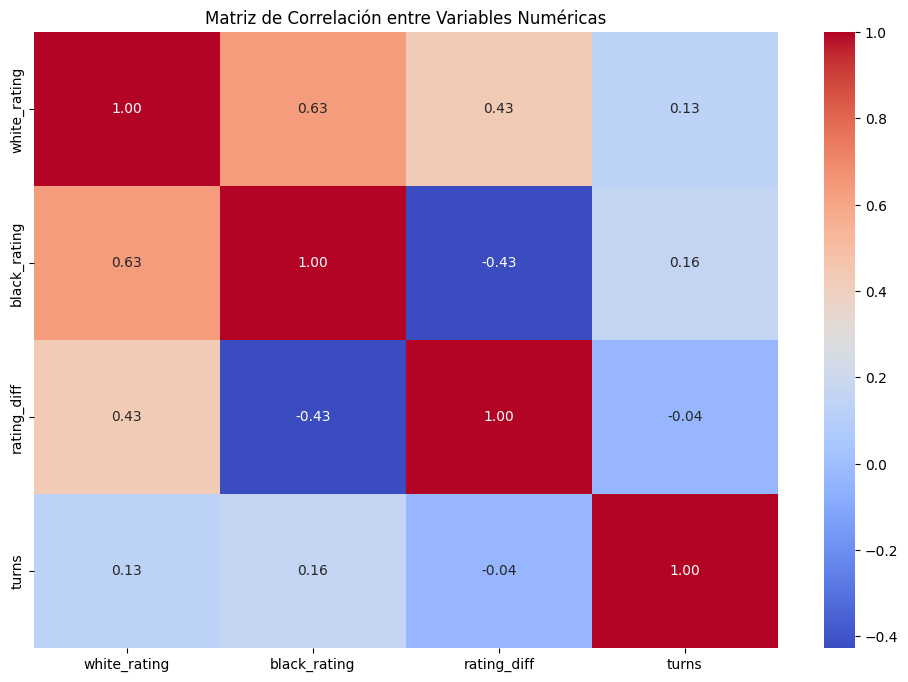

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos solo variables numéricas
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Calculamos matriz de correlación
correlation_matrix = numeric_cols.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()


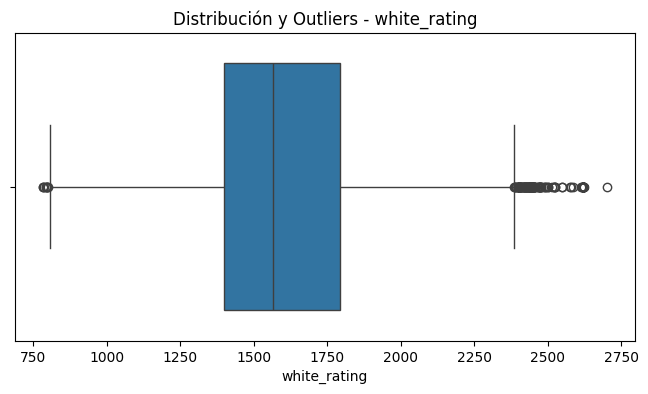

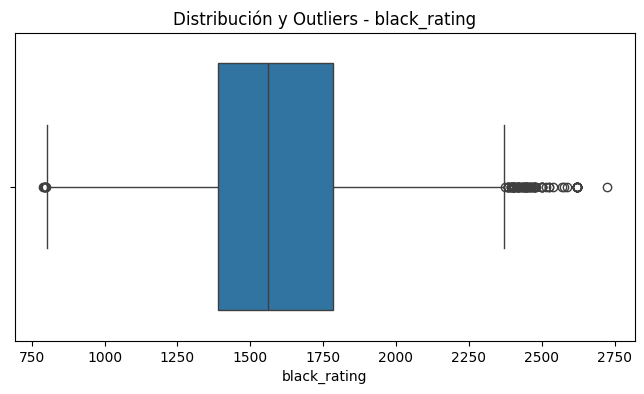

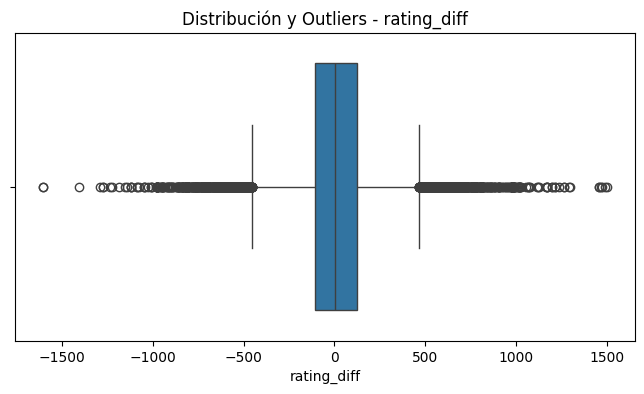

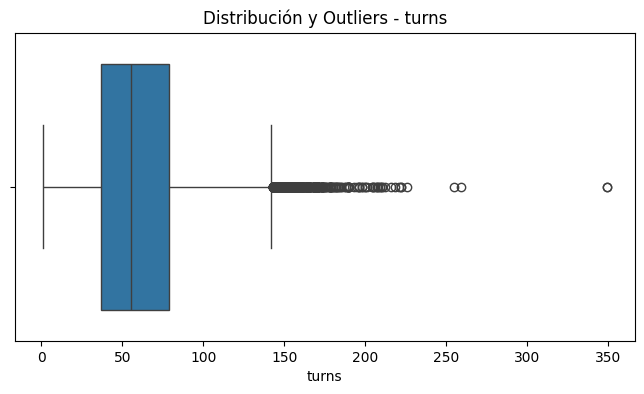

In [140]:
# Boxplots por variable para identificar outliers visualmente
for col in numeric_cols.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Distribución y Outliers - {col}')
    plt.show()


In [141]:
print(df.columns.tolist())


['white_rating', 'black_rating', 'rating_diff', 'rated', 'turns', 'victory_status_mate', 'victory_status_outoftime', 'victory_status_resign', 'increment_code_0+13', 'increment_code_0+15', 'increment_code_0+16', 'increment_code_0+180', 'increment_code_0+20', 'increment_code_0+25', 'increment_code_0+30', 'increment_code_0+40', 'increment_code_1+10', 'increment_code_1+12', 'increment_code_1+13', 'increment_code_1+15', 'increment_code_1+18', 'increment_code_1+19', 'increment_code_1+20', 'increment_code_1+25', 'increment_code_1+30', 'increment_code_1+45', 'increment_code_10+0', 'increment_code_10+1', 'increment_code_10+10', 'increment_code_10+11', 'increment_code_10+12', 'increment_code_10+13', 'increment_code_10+14', 'increment_code_10+15', 'increment_code_10+180', 'increment_code_10+2', 'increment_code_10+20', 'increment_code_10+25', 'increment_code_10+3', 'increment_code_10+30', 'increment_code_10+35', 'increment_code_10+4', 'increment_code_10+40', 'increment_code_10+45', 'increment_code

Precisión del modelo: 19.85 %

Reporte de clasificación:
                                                precision    recall  f1-score   support

             French Defense: Knight Variation       0.29      0.03      0.06        58
                              Horwitz Defense       0.00      0.00      0.00        49
        Queen's Pawn Game: Chigorin Variation       0.00      0.00      0.00        55
              Queen's Pawn Game: Mason Attack       0.18      0.37      0.24        49
                         Scandinavian Defense       1.00      0.07      0.14        40
Scandinavian Defense: Mieses-Kotroc Variation       0.20      0.21      0.21        57
                                  Scotch Game       0.06      0.02      0.03        47
                             Sicilian Defense       0.22      0.27      0.24        75
             Sicilian Defense: Bowdler Attack       0.14      0.24      0.17        50
                         Van't Kruijs Opening       0.23      0.62     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


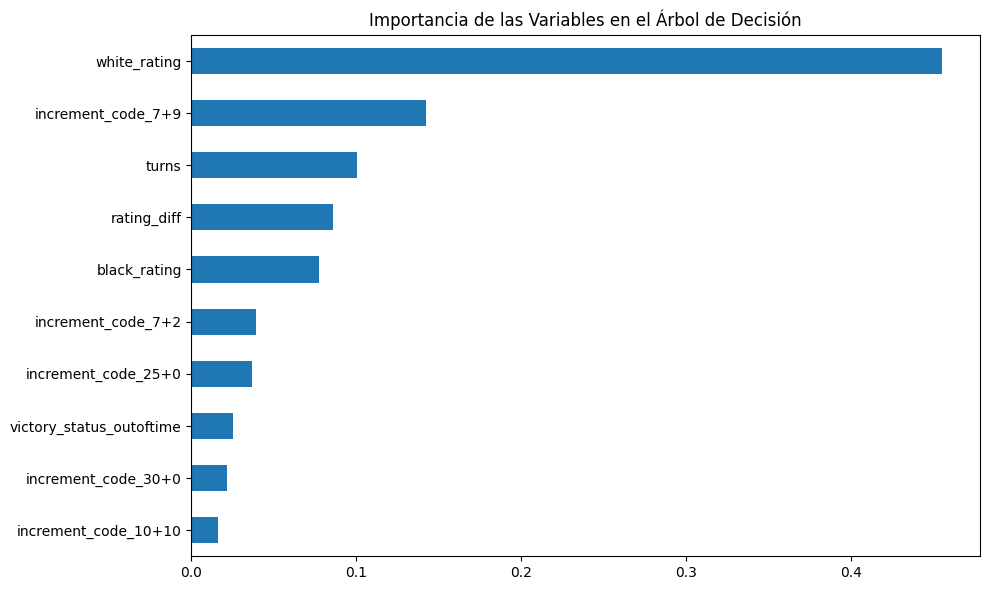

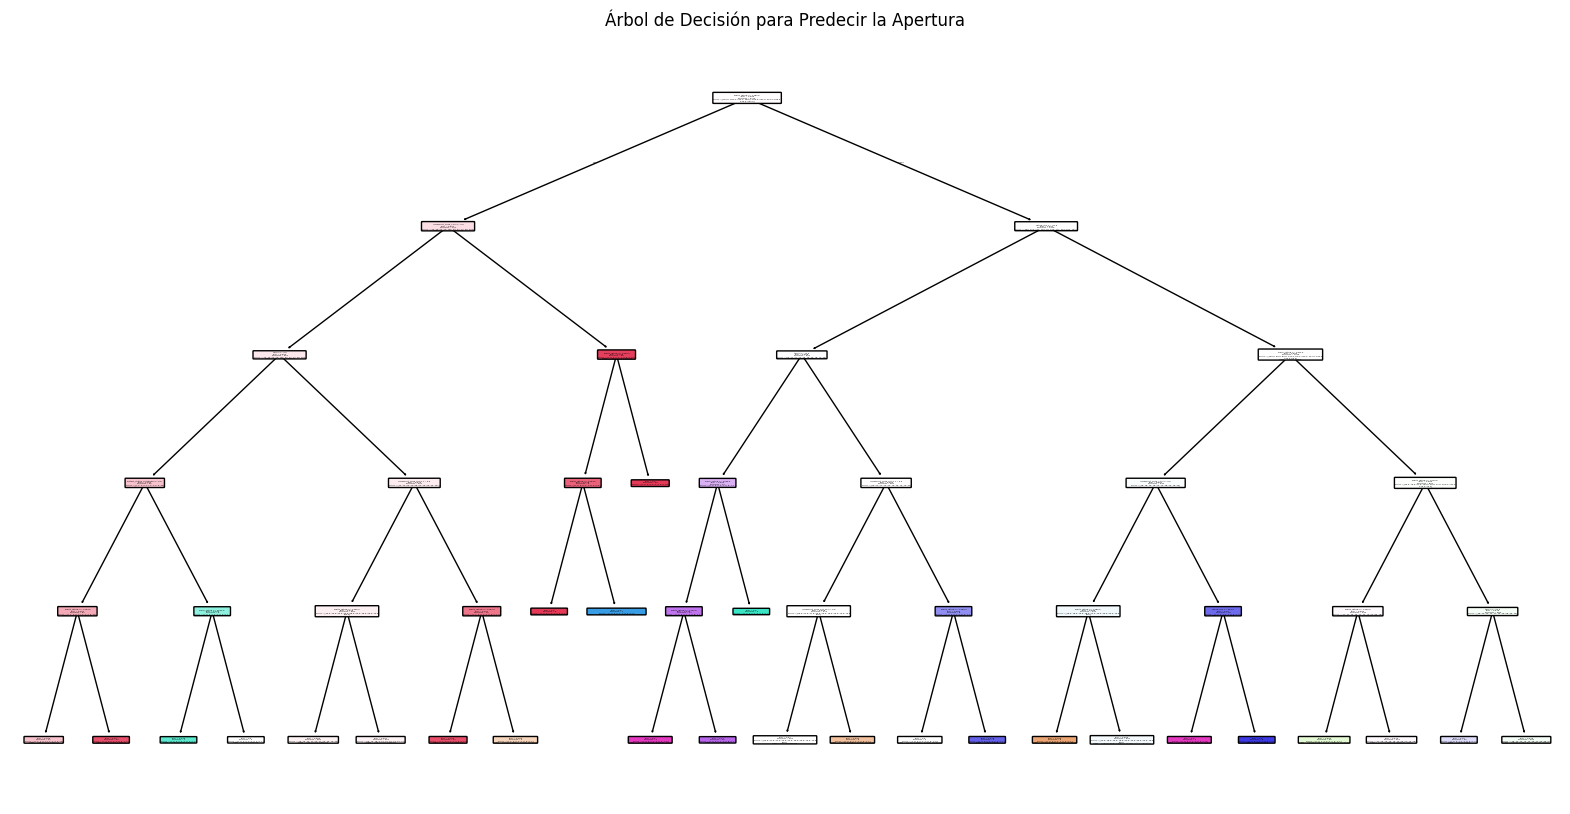

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv('/content/games.csv')

top_openings = df['opening_name'].value_counts().head(10).index
df_top = df[df['opening_name'].isin(top_openings)].copy()

# Codifico la variable objetivo (opening_name)
le = LabelEncoder()
df_top['opening_code'] = le.fit_transform(df_top['opening_name'])

# Preprocesamiento básico
df_top['rating_diff'] = df_top['white_rating'] - df_top['black_rating']

# Variables categóricas a dummies (victory_status e increment_code)
df_encoded = pd.get_dummies(df_top[['rated', 'turns', 'white_rating', 'black_rating', 'rating_diff', 'victory_status', 'increment_code']], drop_first=True)

#  Dividir en train/test
X = df_encoded
y = df_top['opening_code']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entreno el árbol de decisión
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Predicción y evaluación
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", round(acc * 100, 2), "%")
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Visualizo importancia de variables
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances = importances[importances > 0].sort_values(ascending=True)

plt.figure(figsize=(10, 6))
importances.plot(kind='barh')
plt.title("Importancia de las Variables en el Árbol de Decisión")
plt.tight_layout()
plt.show()

# 11. (Opcional) Visualizar árbol
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=le.classes_, filled=True, rounded=True)
plt.title("Árbol de Decisión para Predecir la Apertura")
plt.show()


In [143]:
# Diccionario que agrupe las aperturas en familias
family_mapping = {
    'French Defense': 'French',
    'Horwitz Defense': 'Other',
    'Queen\'s Pawn Game: Chigorin Variation': 'Queen\'s Pawn',
    'Queen\'s Pawn Game: Mason Attack': 'Queen\'s Pawn',
    'Scandinavian Defense': 'Scandinavian',
    'Scandinavian Defense: Mieses-Kotroc Variation': 'Scandinavian',
    'Scotch Game': 'King\'s Pawn',
    'Sicilian Defense': 'Sicilian',
    'Sicilian Defense: Bowdler Attack': 'Sicilian',
    'Van\'t Kruijs Opening': 'Other'
}

# Mapeo a una nueva columna
df['opening_family'] = df['opening_name'].map(family_mapping)

# Valores nulos (aperturas que no estaban en el mapeo)
missing = df['opening_family'].isnull().sum()
print(f"Aperturas no mapeadas: {missing}")

# Uso solo los datos con familia definida
df = df[df['opening_family'].notnull()]


Aperturas no mapeadas: 17604


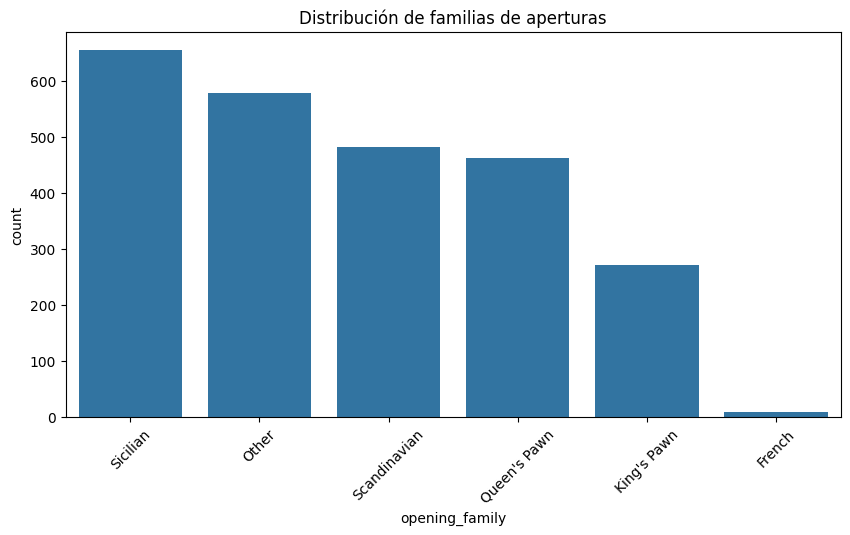

In [144]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='opening_family', order=df['opening_family'].value_counts().index)
plt.title('Distribución de familias de aperturas')
plt.xticks(rotation=45)
plt.show()


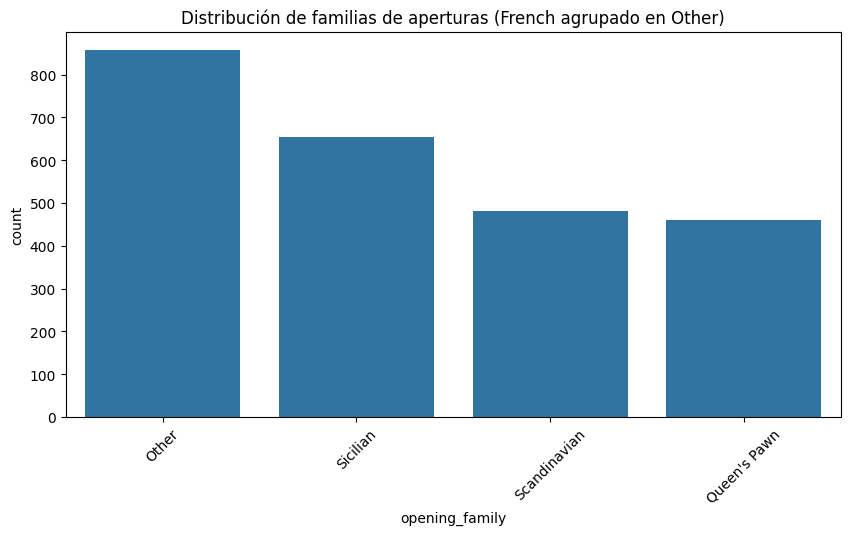

In [145]:
# Columna 'opening_family' agrupando por palabra clave en 'opening_name'
def clasificar_apertura(nombre):
    if 'Sicilian' in nombre:
        return 'Sicilian'
    elif 'French' in nombre:
        return 'French'
    elif 'Scandinavian' in nombre:
        return 'Scandinavian'
    elif "Queen's Pawn" in nombre:
        return "Queen's Pawn"
    elif "King's Pawn" in nombre:
        return "King's Pawn"
    else:
        return 'Other'

df['opening_family'] = df['opening_name'].apply(clasificar_apertura)

# 'French' dentro de 'Other'
df['opening_family'] = df['opening_family'].replace('French', 'Other')

# Muestro la nueva distribución

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='opening_family', order=df['opening_family'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribución de familias de aperturas (French agrupado en Other)")
plt.show()


Precisión del modelo: 37.68 %

Reporte de clasificación:
               precision    recall  f1-score   support

       Other       0.43      0.63      0.51       171
Queen's Pawn       0.26      0.41      0.32        94
Scandinavian       0.67      0.02      0.04        97
    Sicilian       0.42      0.28      0.33       129

    accuracy                           0.38       491
   macro avg       0.44      0.34      0.30       491
weighted avg       0.44      0.38      0.34       491



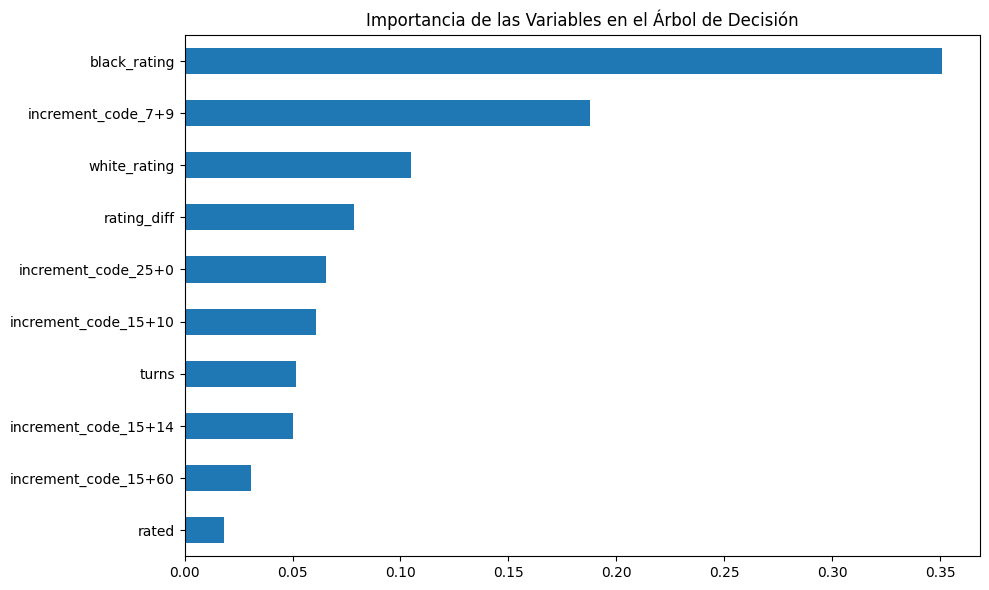

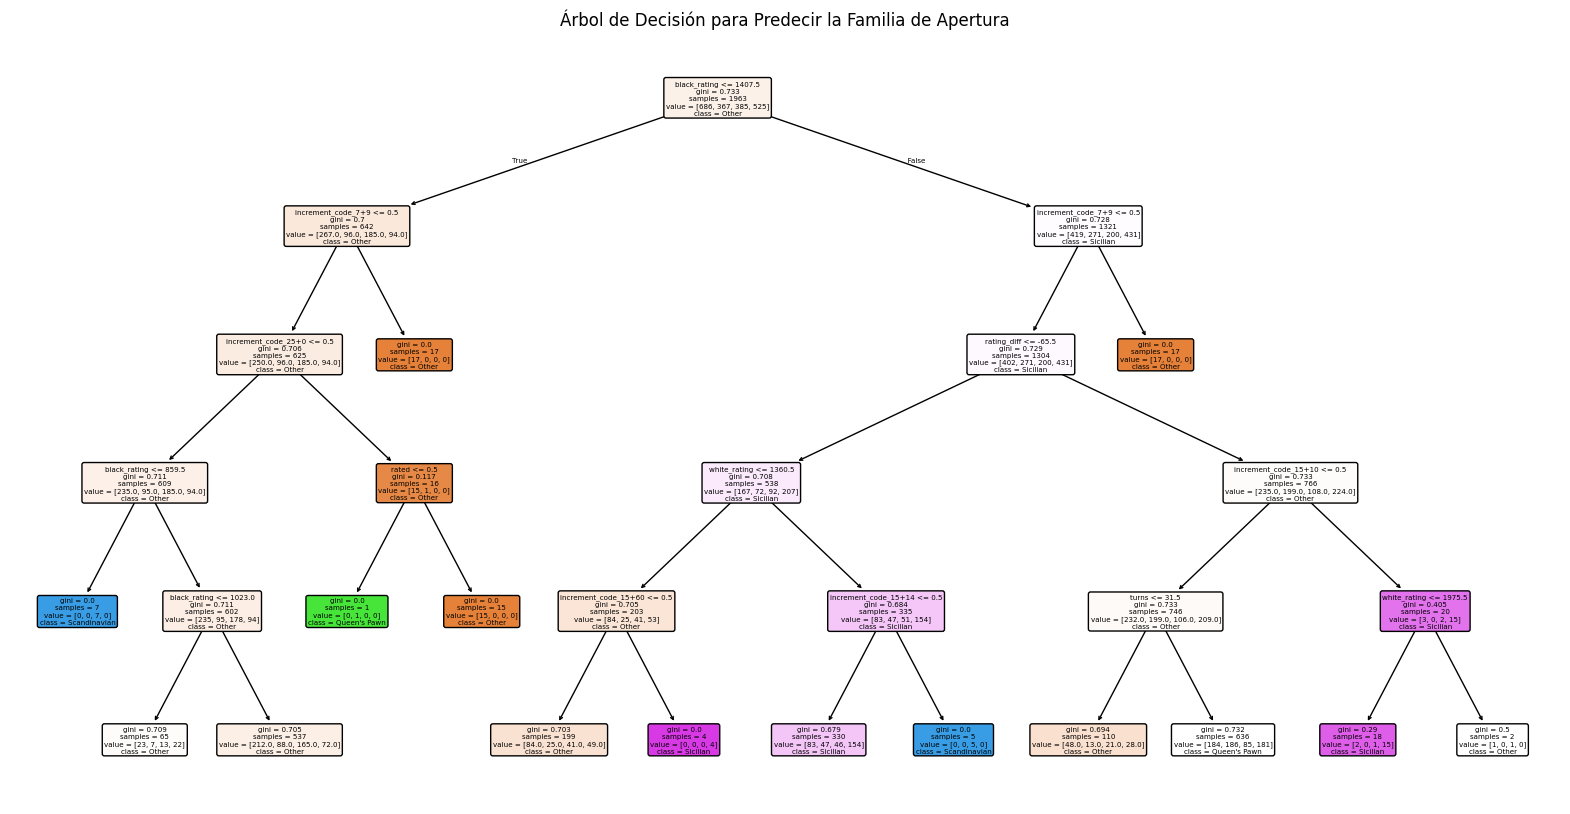

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# 10 familias más comunes
top_families = df['opening_family'].value_counts().head(10).index
df_top = df[df['opening_family'].isin(top_families)].copy()

# Variable objetivo (opening_family)
le = LabelEncoder()
df_top['family_code'] = le.fit_transform(df_top['opening_family'])

# Variable rating_diff
df_top['rating_diff'] = df_top['white_rating'] - df_top['black_rating']

# Variables categóricas (victory_status e increment_code)
df_encoded = pd.get_dummies(df_top[['rated', 'turns', 'white_rating', 'black_rating', 'rating_diff',
                                    'victory_status', 'increment_code']], drop_first=True)

# Divido en conjunto de entrenamiento y prueba
X = df_encoded
y = df_top['family_code']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Árbol de decisión
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Evaluación
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", round(acc * 100, 2), "%")
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Importancia de variables
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances = importances[importances > 0].sort_values(ascending=True)

plt.figure(figsize=(10, 6))
importances.plot(kind='barh')
plt.title("Importancia de las Variables en el Árbol de Decisión")
plt.tight_layout()
plt.show()

# 11. Visualización
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=le.classes_, filled=True, rounded=True)
plt.title("Árbol de Decisión para Predecir la Familia de Apertura")
plt.show()


<ipython-input-147-0277621a398f>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['opening_family_code'] = le.fit_transform(df['opening_family'])


Precisión del modelo: 34.36 %

Reporte de clasificación:
                       precision    recall  f1-score   support

     Horwitz Defense       0.50      0.02      0.04        44
   Queen's Pawn Game       0.14      0.02      0.04        89
Scandinavian Defense       0.32      0.36      0.34        97
         Scotch Game       1.00      0.05      0.10        55
    Sicilian Defense       0.32      0.82      0.46       125
Van't Kruijs Opening       0.67      0.30      0.42        79

            accuracy                           0.34       489
           macro avg       0.49      0.26      0.23       489
        weighted avg       0.44      0.34      0.27       489



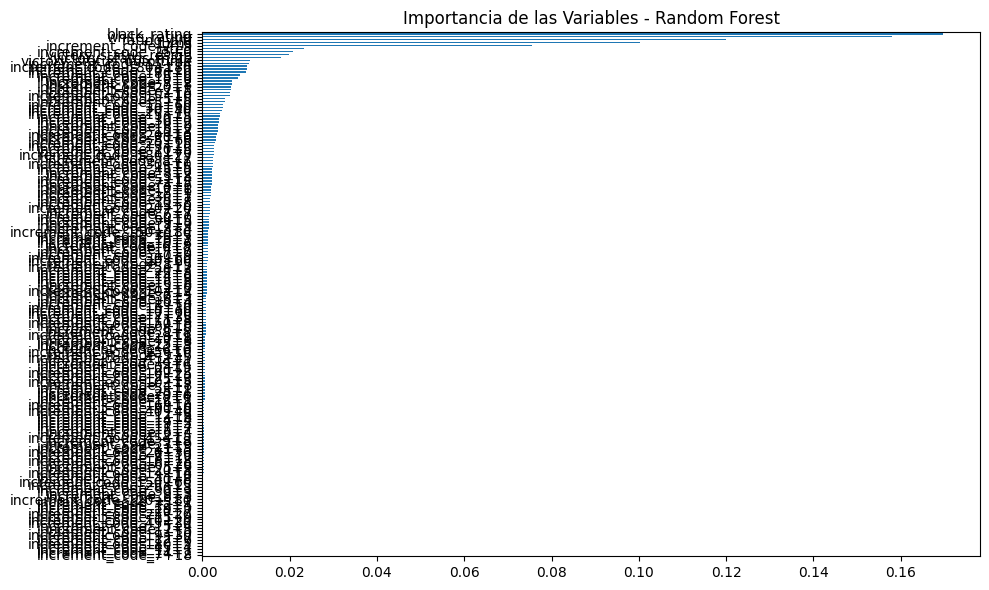

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Rating_diff
df['rating_diff'] = df['white_rating'] - df['black_rating']

# Variable opening_family a partir del nombre de apertura
df['opening_family'] = df['opening_name'].str.extract(r"(^[\w\s']+)")
df.loc[df['opening_family'] == 'French', 'opening_family'] = 'Other'

# Clases más comunes (>=100 instancias)
top_families = df['opening_family'].value_counts()
top_families = top_families[top_families >= 100].index
df = df[df['opening_family'].isin(top_families)]

# Variable objetivo
le = LabelEncoder()
df['opening_family_code'] = le.fit_transform(df['opening_family'])

# Variables dummy para las categóricas
df_encoded = pd.get_dummies(df[['rated', 'turns', 'white_rating', 'black_rating', 'rating_diff', 'victory_status', 'increment_code']], drop_first=True)

# División train/test
X = df_encoded
y = df['opening_family_code']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento con Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Evaluación
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", round(acc * 100, 2), "%")
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Importancia de variables
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances[importances > 0].sort_values(ascending=True)

plt.figure(figsize=(10, 6))
importances.plot(kind='barh')
plt.title("Importancia de las Variables - Random Forest")
plt.tight_layout()
plt.show()


Precisión del modelo: 32.72 %

Reporte de clasificación:
                       precision    recall  f1-score   support

               Other       0.00      0.00      0.00        44
   Queen's Pawn Game       0.29      0.29      0.29        89
Scandinavian Defense       0.28      0.44      0.34        97
         Scotch Game       0.00      0.00      0.00        55
    Sicilian Defense       0.33      0.59      0.43       125
Van't Kruijs Opening       0.71      0.22      0.33        79

            accuracy                           0.33       489
           macro avg       0.27      0.26      0.23       489
        weighted avg       0.31      0.33      0.28       489



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


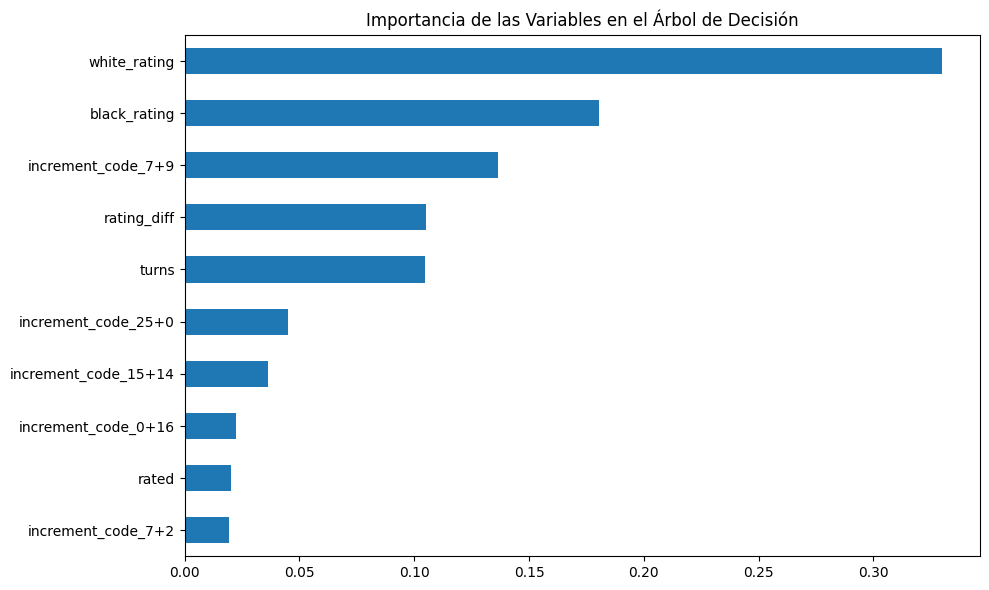

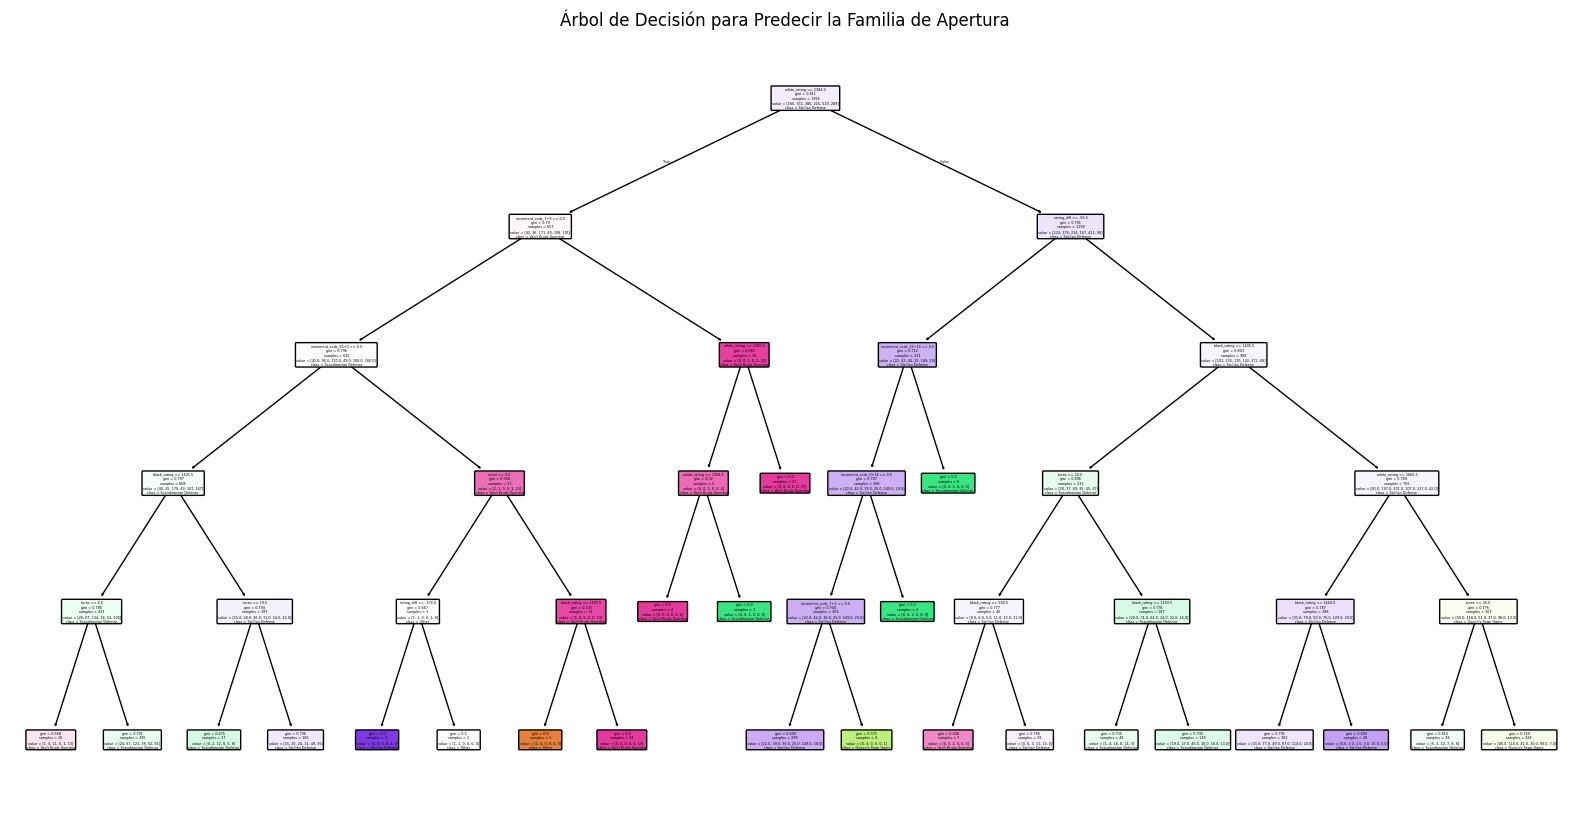

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Columna 'opening_family'
df['opening_family'] = df['opening_name'].str.split(':').str[0].str.strip()

# Familias poco frecuentes en 'Other'
top_families = df['opening_family'].value_counts().nlargest(5).index
df['opening_family'] = df['opening_family'].apply(lambda x: x if x in top_families else 'Other')

# Codifico variable objetivo
le = LabelEncoder()
df['opening_family_code'] = le.fit_transform(df['opening_family'])

# One-hot encoding para variables categóricas
df_encoded = pd.get_dummies(df[['rated', 'turns', 'white_rating', 'black_rating', 'rating_diff', 'victory_status', 'increment_code']], drop_first=True)

# Separo variables
X = df_encoded
y = df['opening_family_code']

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entreno el árbol de decisión
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Evalación
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", round(acc * 100, 2), "%")
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Importancia de variables
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances = importances[importances > 0].sort_values(ascending=True)

plt.figure(figsize=(10, 6))
importances.plot(kind='barh')
plt.title("Importancia de las Variables en el Árbol de Decisión")
plt.tight_layout()
plt.show()

# Visualización
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=le.classes_, filled=True, rounded=True)
plt.title("Árbol de Decisión para Predecir la Familia de Apertura")
plt.show()


Precisión del modelo: 36.4 %

Reporte de clasificación:
                       precision    recall  f1-score   support

               Other       0.30      0.14      0.19        44
   Queen's Pawn Game       0.34      0.34      0.34        89
Scandinavian Defense       0.29      0.30      0.29        97
         Scotch Game       0.42      0.24      0.30        55
    Sicilian Defense       0.36      0.54      0.43       125
Van't Kruijs Opening       0.50      0.42      0.46        79

            accuracy                           0.36       489
           macro avg       0.37      0.33      0.34       489
        weighted avg       0.37      0.36      0.36       489



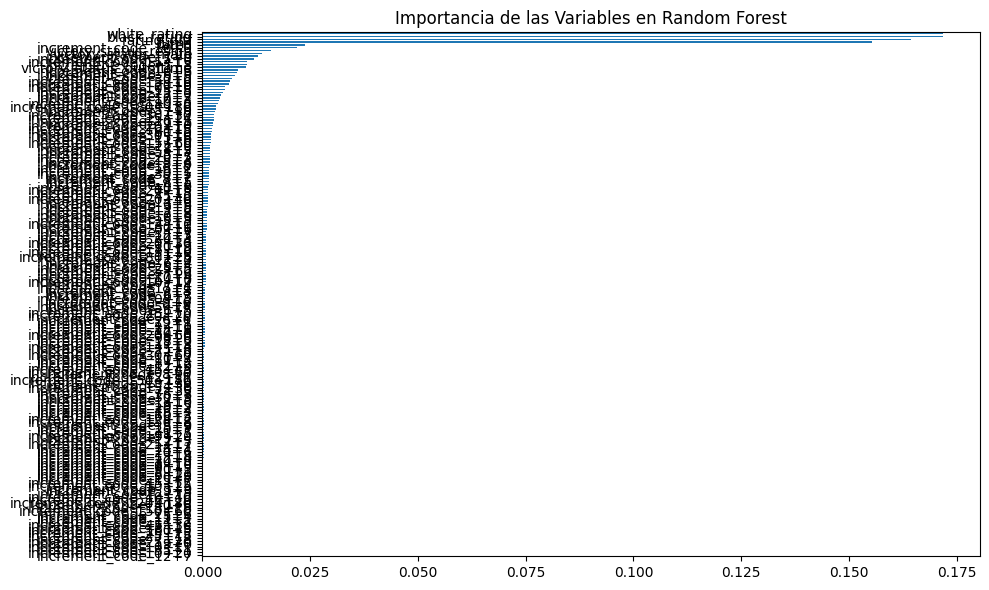

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Columna 'opening_family'
df['opening_family'] = df['opening_name'].str.split(':').str[0].str.strip()

# Familias poco frecuentes en 'Other'
top_families = df['opening_family'].value_counts().nlargest(5).index
df['opening_family'] = df['opening_family'].apply(lambda x: x if x in top_families else 'Other')

# Codifico variable objetivo
le = LabelEncoder()
df['opening_family_code'] = le.fit_transform(df['opening_family'])

# One-hot encoding de variables categóricas
df_encoded = pd.get_dummies(df[['rated', 'turns', 'white_rating', 'black_rating', 'rating_diff', 'victory_status', 'increment_code']], drop_first=True)

# Separo características y etiquetas
X = df_encoded
y = df['opening_family_code']

# División en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entreno Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicción y evaluación
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", round(acc * 100, 2), "%")
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Importancia de variables
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances[importances > 0].sort_values(ascending=True)

plt.figure(figsize=(10, 6))
importances.plot(kind='barh')
plt.title("Importancia de las Variables en Random Forest")
plt.tight_layout()
plt.show()


In [150]:
!pip install imbalanced-learn


Precisión del modelo: 32.92 %

Reporte de clasificación:
                       precision    recall  f1-score   support

               Other       0.20      0.18      0.19        44
   Queen's Pawn Game       0.30      0.28      0.29        89
Scandinavian Defense       0.30      0.30      0.30        97
         Scotch Game       0.29      0.25      0.27        55
    Sicilian Defense       0.37      0.39      0.38       125
Van't Kruijs Opening       0.43      0.46      0.44        79

            accuracy                           0.33       489
           macro avg       0.31      0.31      0.31       489
        weighted avg       0.33      0.33      0.33       489



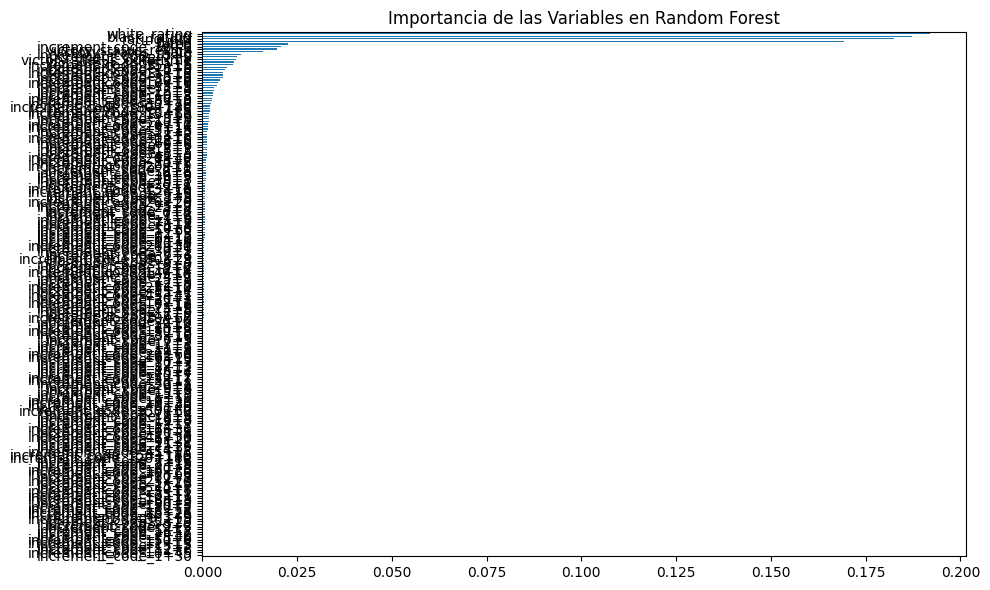

In [151]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# Uso de SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Entreno el modelo con los datos balanceados
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_resampled, y_resampled)

# Predicciones
y_pred = rf.predict(X_test)

# Evaluación
acc = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", round(acc * 100, 2), "%")
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Importancia de variables
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
importances.plot(kind='barh')
plt.title("Importancia de las Variables en Random Forest")
plt.tight_layout()
plt.show()


In [152]:
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score

# Gradient Boosting tradicional
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
print("=== Gradient Boosting ===")
print("Precisión:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb, target_names=le.classes_))

# HistGradientBoosting (más eficiente)
hgb_clf = HistGradientBoostingClassifier(random_state=42)
hgb_clf.fit(X_train, y_train)
y_pred_hgb = hgb_clf.predict(X_test)
print("=== HistGradientBoosting ===")
print("Precisión:", accuracy_score(y_test, y_pred_hgb))
print(classification_report(y_test, y_pred_hgb, target_names=le.classes_))

# Multinomial Naive Bayes (necesita valores positivos)
scaler = MinMaxScaler()
X_train_nb = scaler.fit_transform(X_train)
X_test_nb = scaler.transform(X_test)

nb_clf = MultinomialNB()
nb_clf.fit(X_train_nb, y_train)
y_pred_nb = nb_clf.predict(X_test_nb)
print("=== Multinomial Naive Bayes ===")
print("Precisión:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb, target_names=le.classes_))


=== Gradient Boosting ===
Precisión: 0.3783231083844581
                      precision    recall  f1-score   support

               Other       0.36      0.09      0.15        44
   Queen's Pawn Game       0.35      0.27      0.30        89
Scandinavian Defense       0.35      0.35      0.35        97
         Scotch Game       0.53      0.18      0.27        55
    Sicilian Defense       0.38      0.66      0.48       125
Van't Kruijs Opening       0.42      0.38      0.40        79

            accuracy                           0.38       489
           macro avg       0.40      0.32      0.32       489
        weighted avg       0.39      0.38      0.36       489

=== HistGradientBoosting ===
Precisión: 0.37014314928425357
                      precision    recall  f1-score   support

               Other       0.24      0.11      0.15        44
   Queen's Pawn Game       0.35      0.33      0.34        89
Scandinavian Defense       0.32      0.34      0.33        97
         Sco